<a href="https://colab.research.google.com/github/Sunflower47/-Junior-Data-Analyst/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая часть

Импортирование библиотек

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import random
import math


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Скачивания файла, сортировка и удаление дупликатов

In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/165sp-lWd1L4qWxggw25DJo_njOCvzdUjAd414NSE8co/edit#gid=1439079331'
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

data = pd.read_csv(url)
data = data.drop(['good (1)'], axis=1)

sorted_data = data.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending =[True, True, True, False]) # сортировка

sorted_data = sorted_data[~sorted_data[['area', 'keyword']].duplicated(keep='first')] # удаление дупликатов

Проверка, какие столбцы содержат нечисловые данные

In [4]:
sorted_data.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
count            object
x               float64
y                object
dtype: object

Конвертация числовых данных в соответствующий формат, удаление строк с нечисловыми данными

In [5]:
def converter(x):
  try:
    k = float(x)
    return(float(x))
  except:
    return np.nan


sorted_data['count'] = sorted_data['count'].apply(converter)
sorted_data['y'] = sorted_data['y'].apply(converter)

sorted_data = sorted_data.dropna()

Назначение цветов

In [ ]:
color_list = set(['#9edae5', '#dbdb8d', '#c7c7c7', '#f7b6d2', '#c49c94', '#c5b0d5', '#ff9896', '#98df8a','#ffbb78', '#aec7e8'])

color = []

start = sorted_data['cluster'][sorted_data.index[0]]
start_color = '#9edae5'
start_area = sorted_data['area'][sorted_data.index[0]]



for i in sorted_data.index:

  if sorted_data['cluster'][i] == start:
    color.append(start_color)

  else:
    color_list.remove(start_color)
    start_color = random.choice(tuple(color_list))
    start = sorted_data['cluster'][i]
    color.append(start_color)

  if sorted_data['area'][i] != start_area:
    color_list = set(['#9edae5', '#dbdb8d', '#c7c7c7', '#f7b6d2', '#c49c94', '#c5b0d5', '#ff9896', '#98df8a','#ffbb78', '#aec7e8'])
    start_area = sorted_data['area'][i]
  
    


sorted_data['color'] = color

Скачивание файла

In [7]:
sorted_data.to_csv('file.csv') 

# Вторая часть

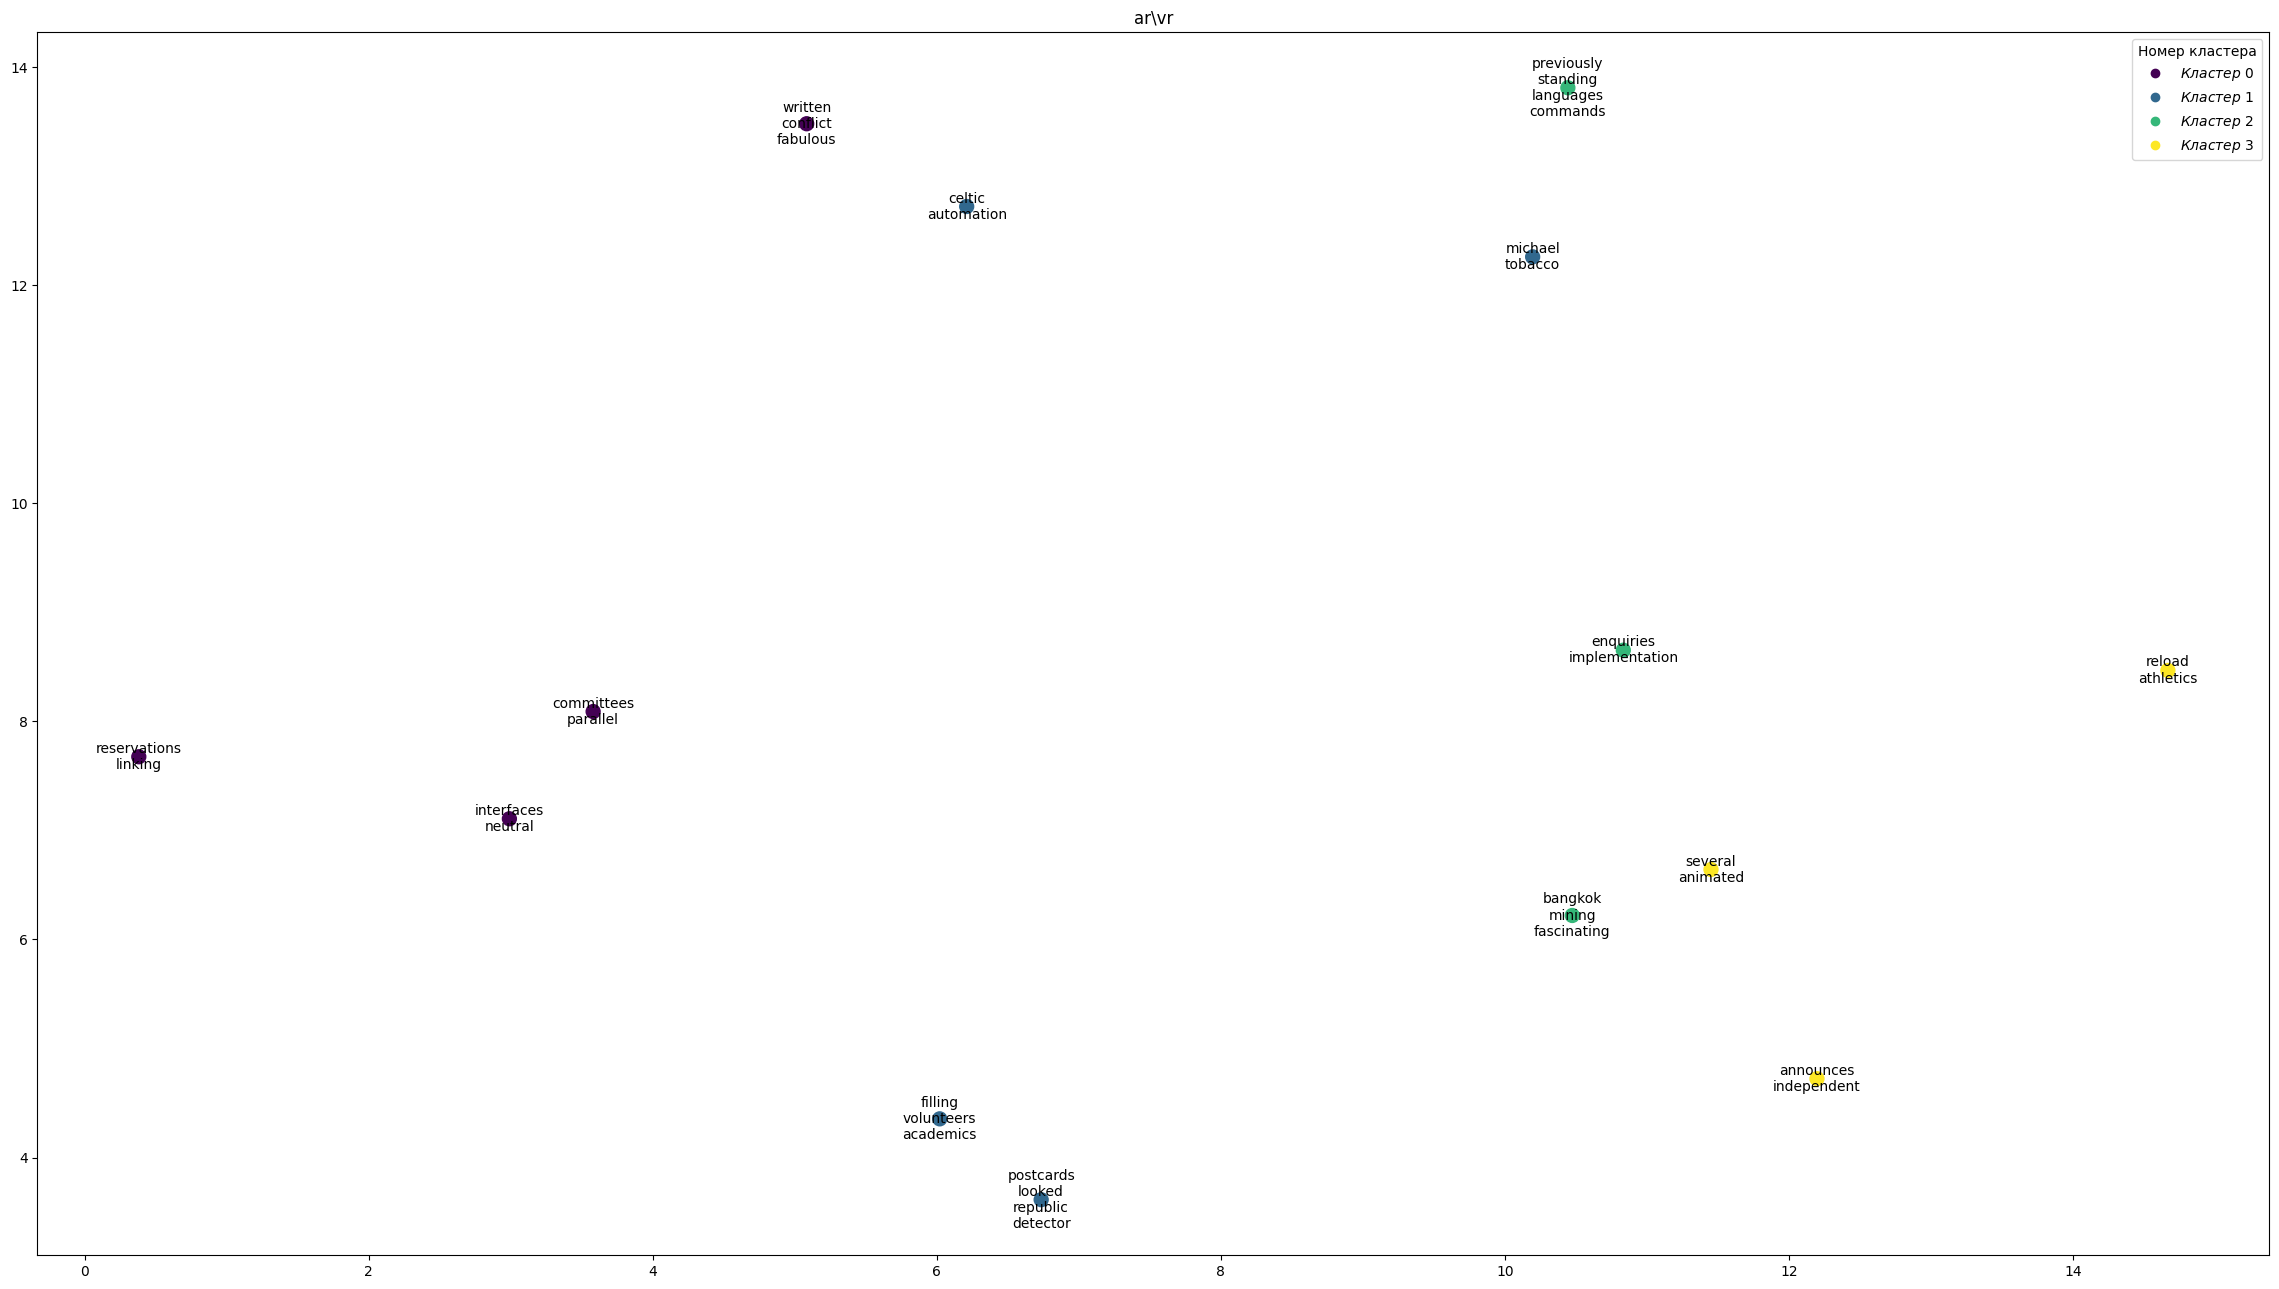

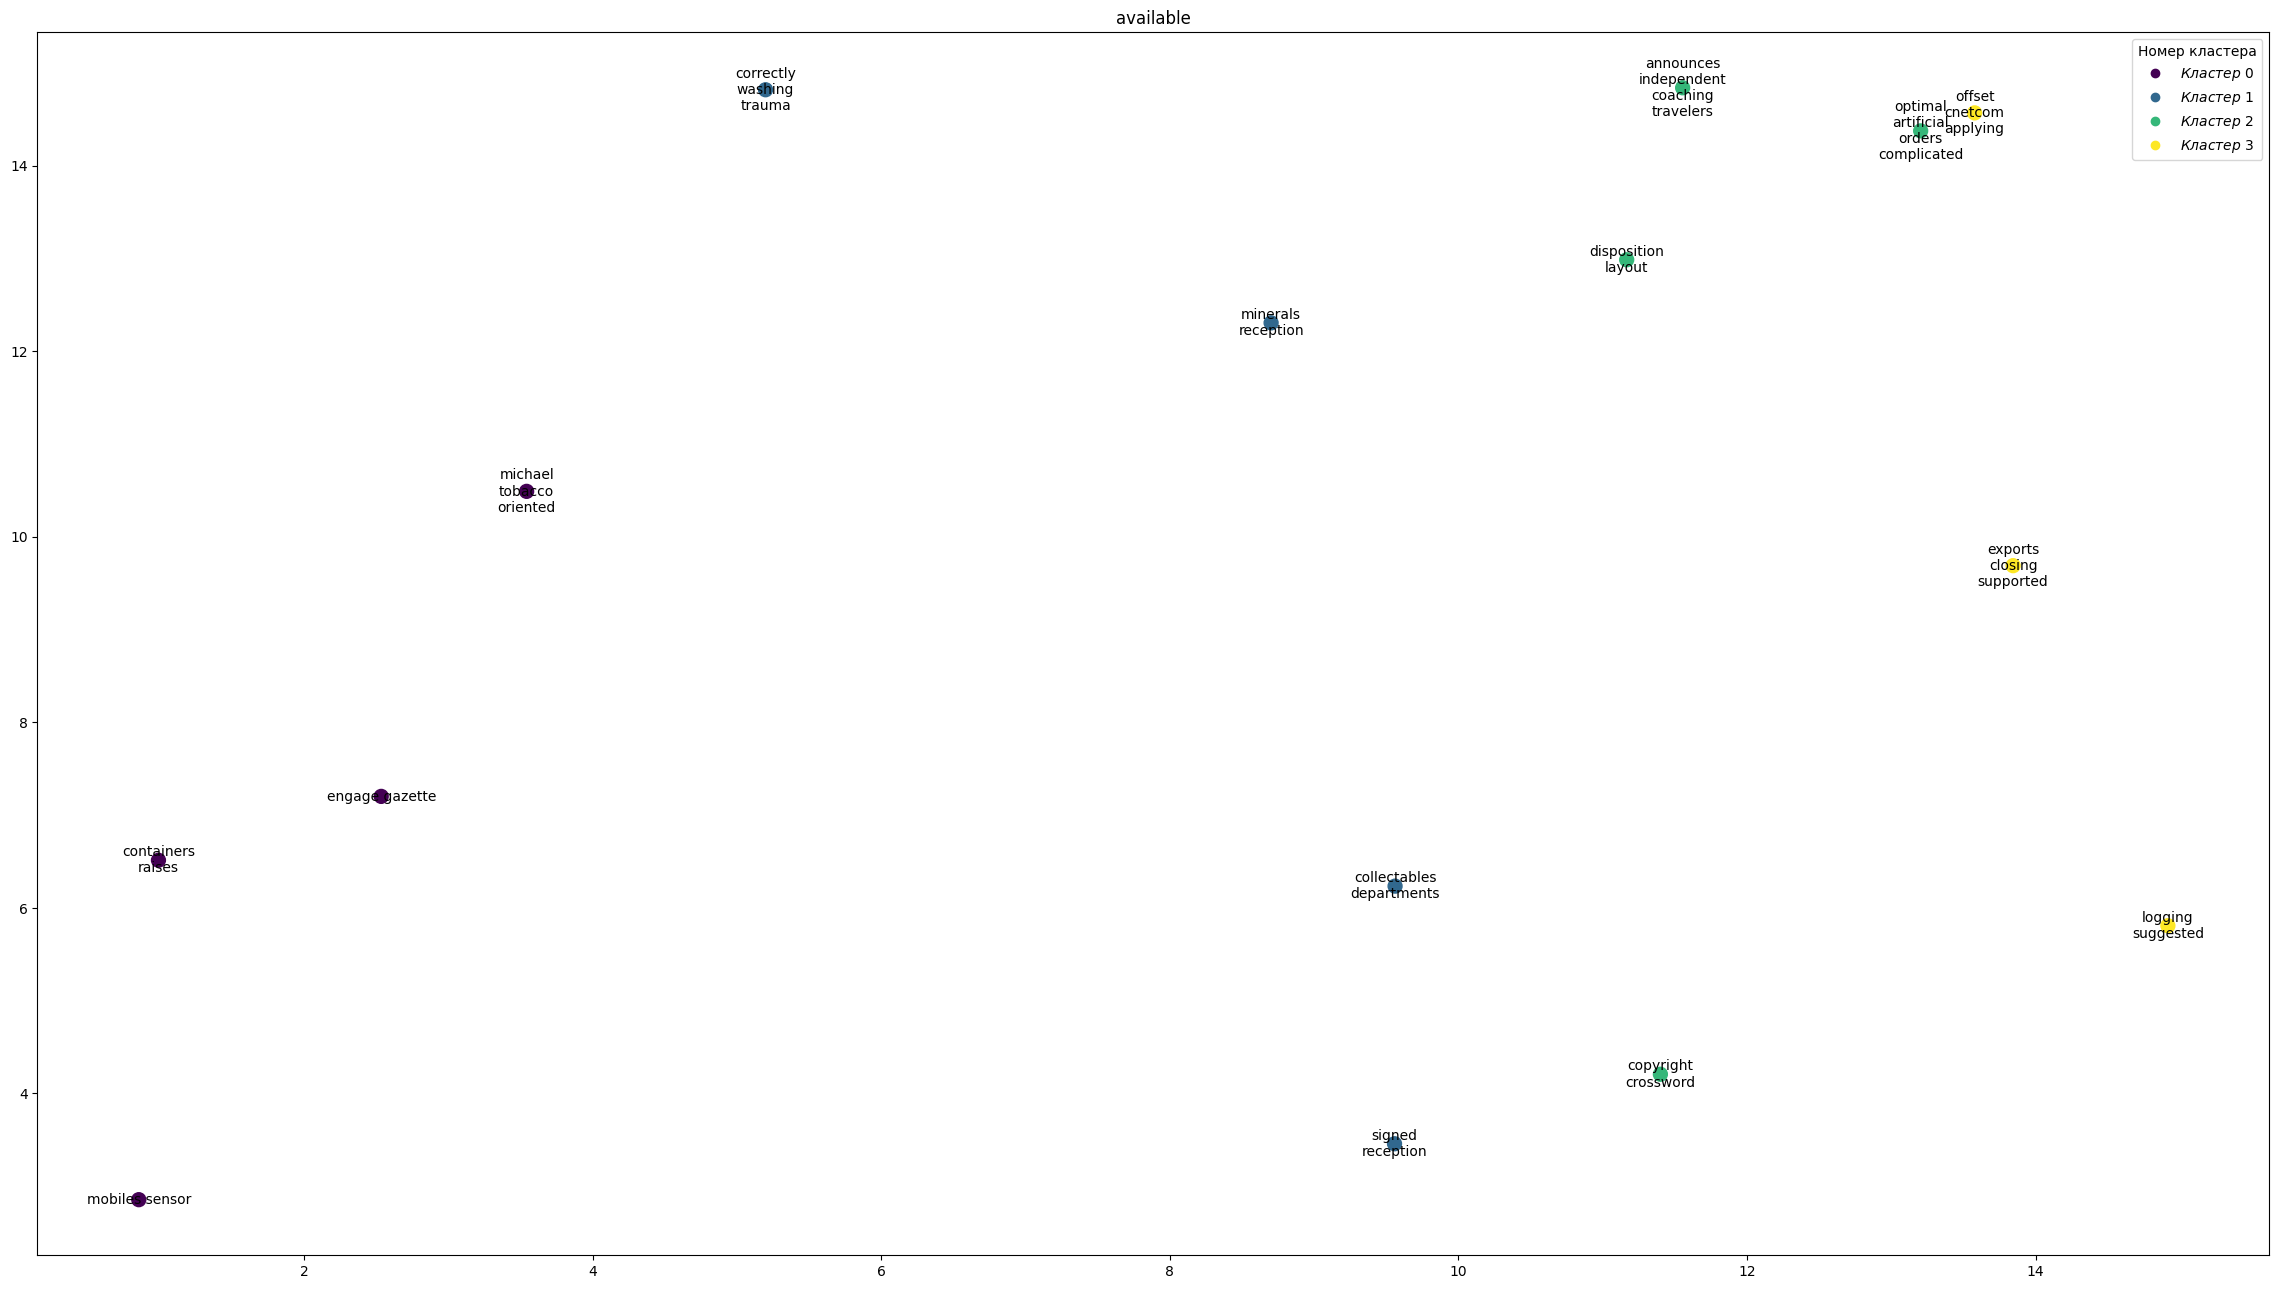

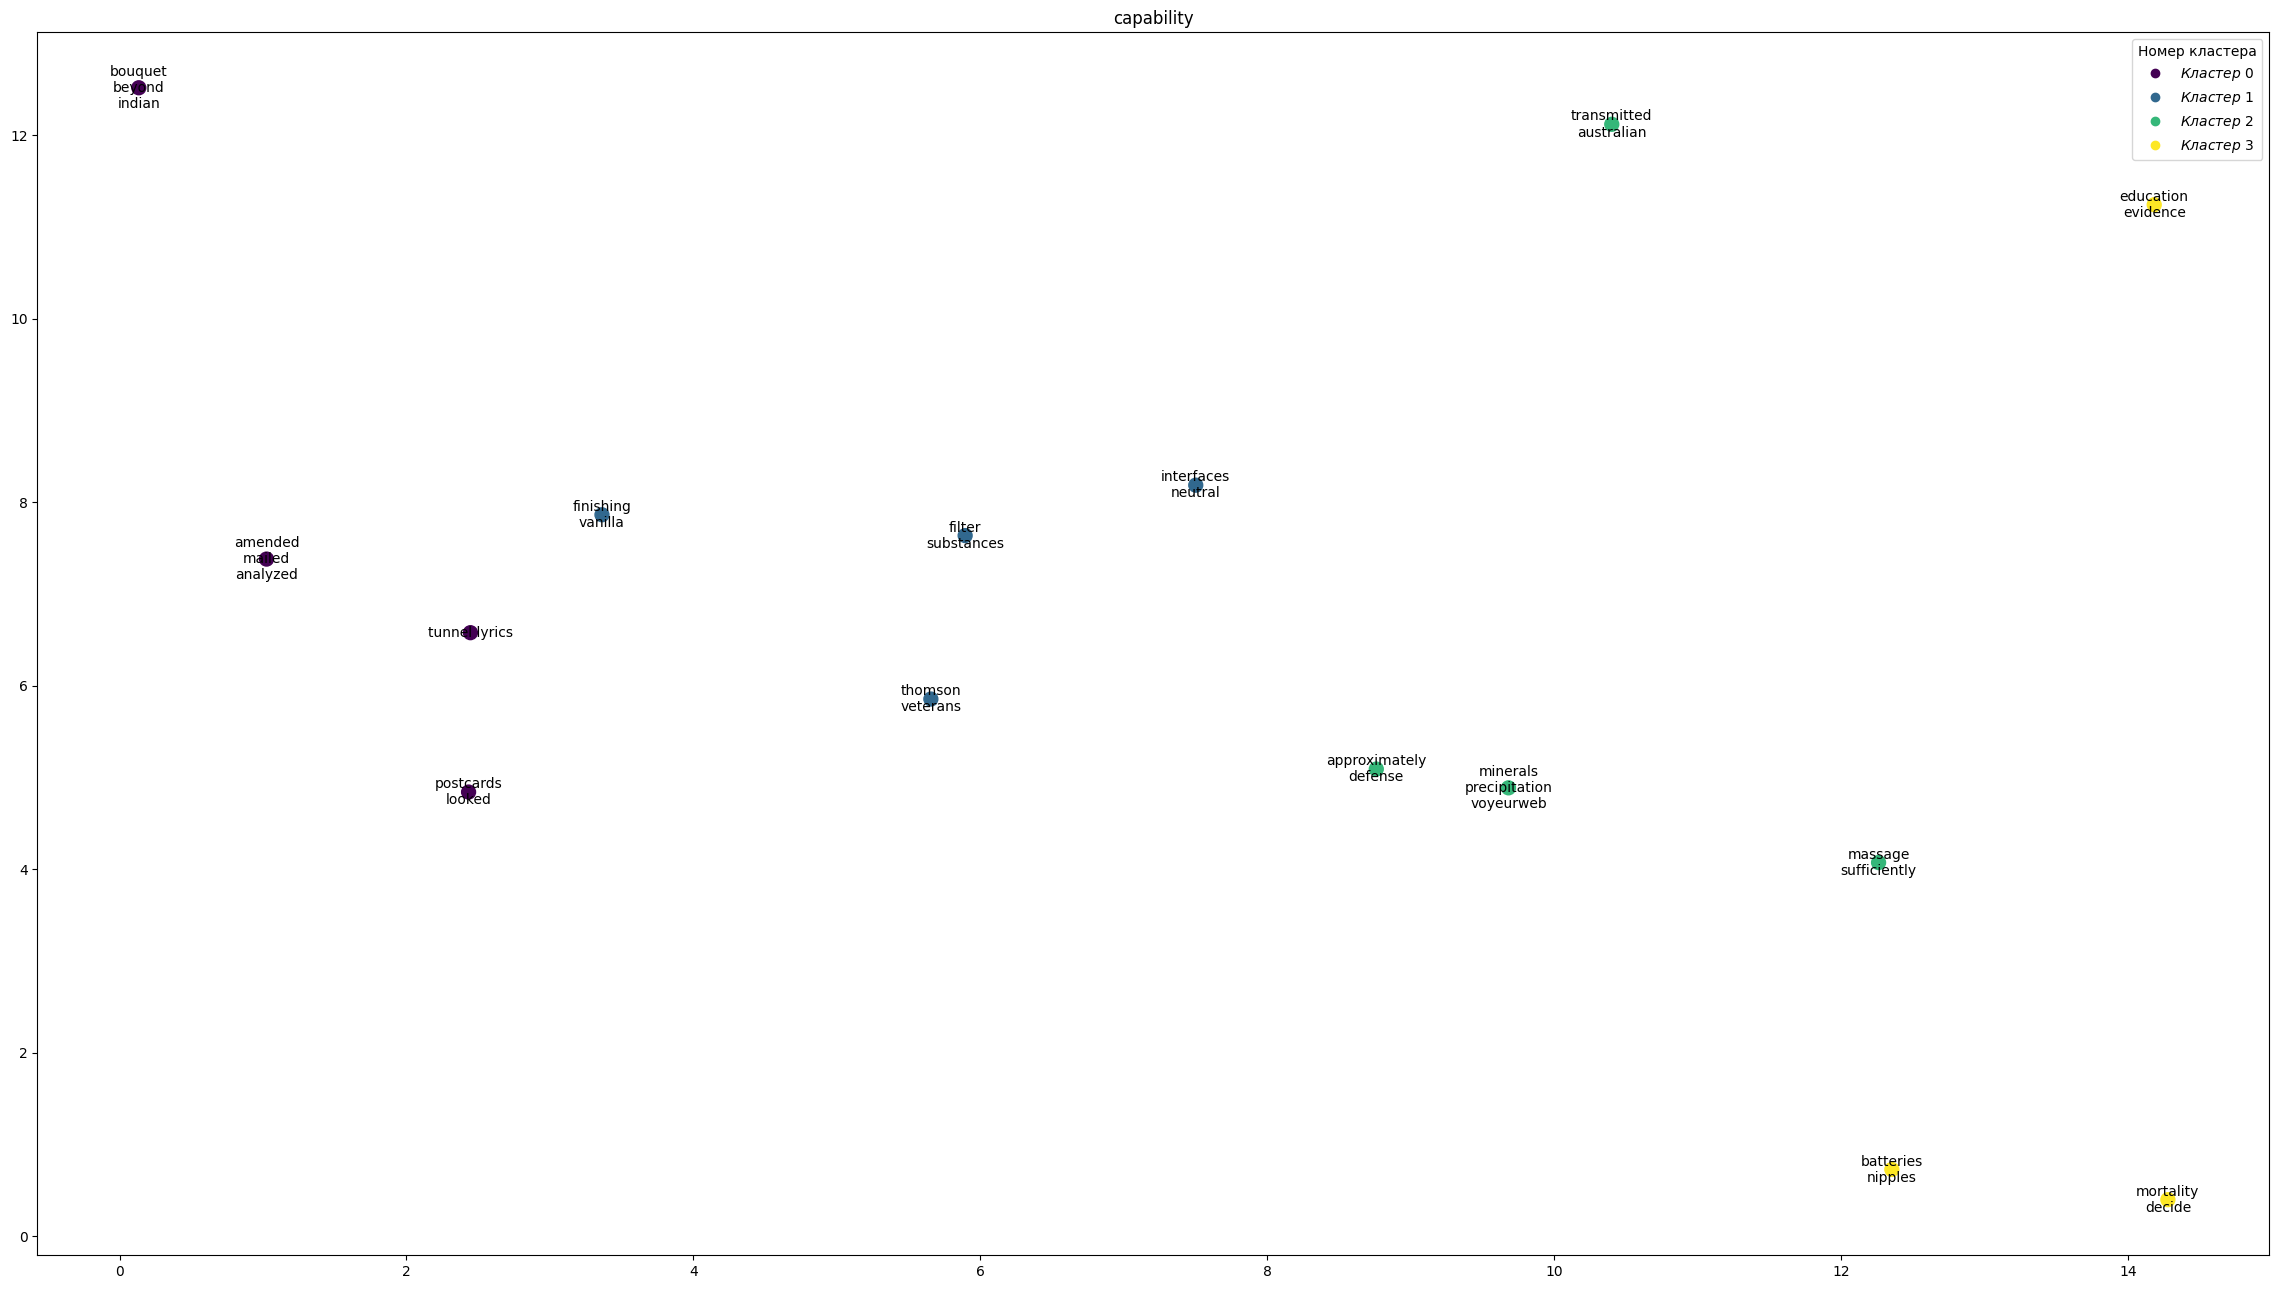

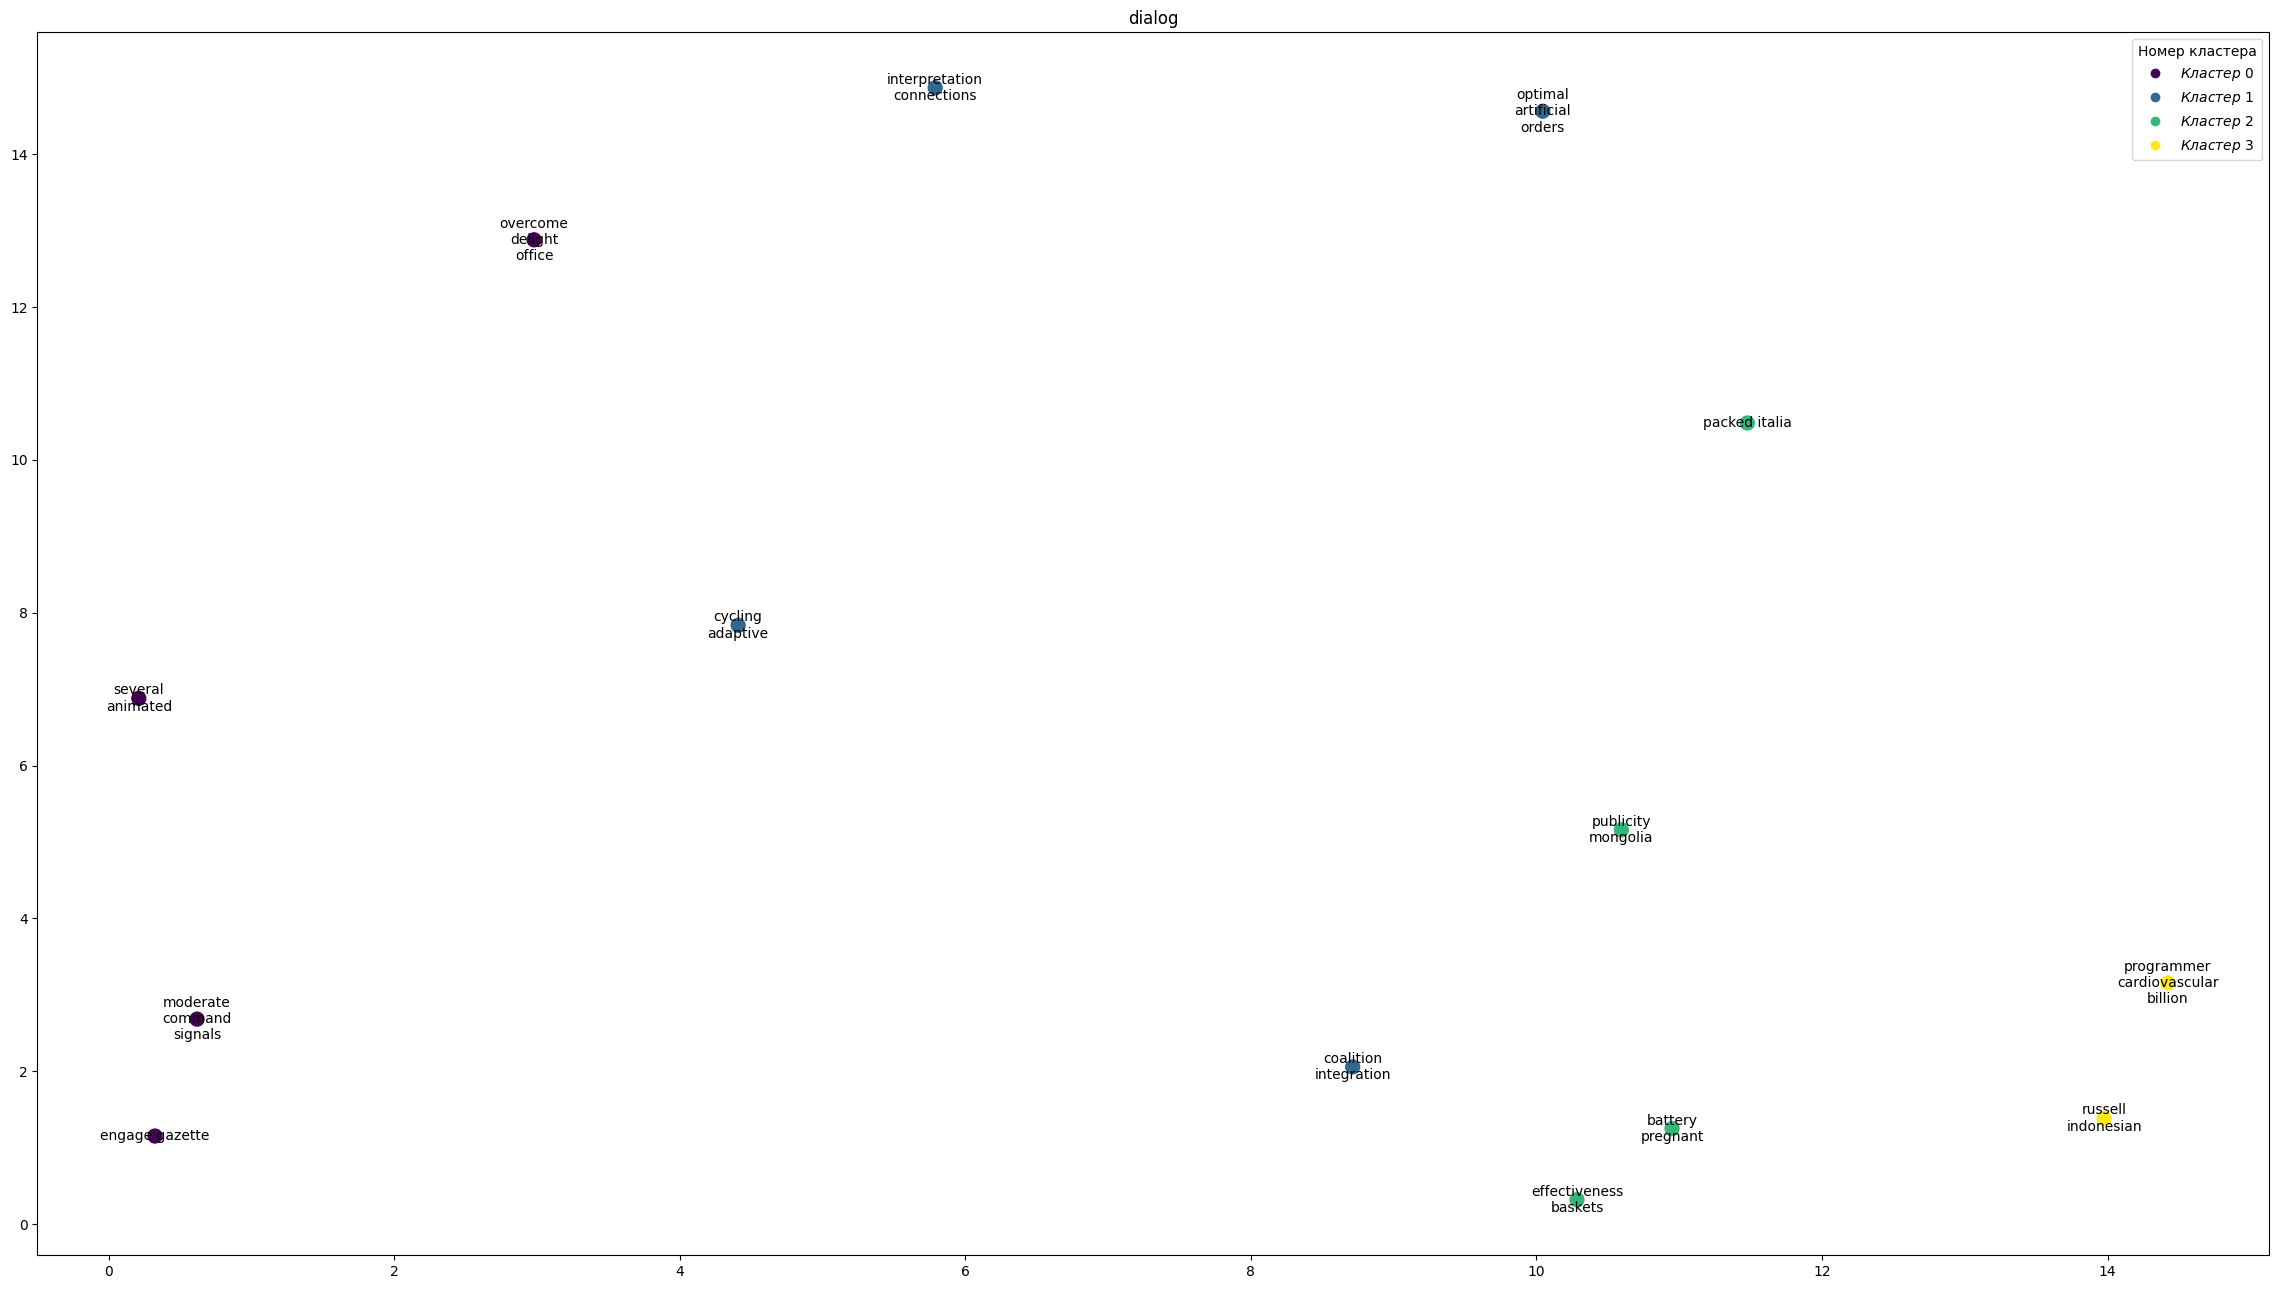

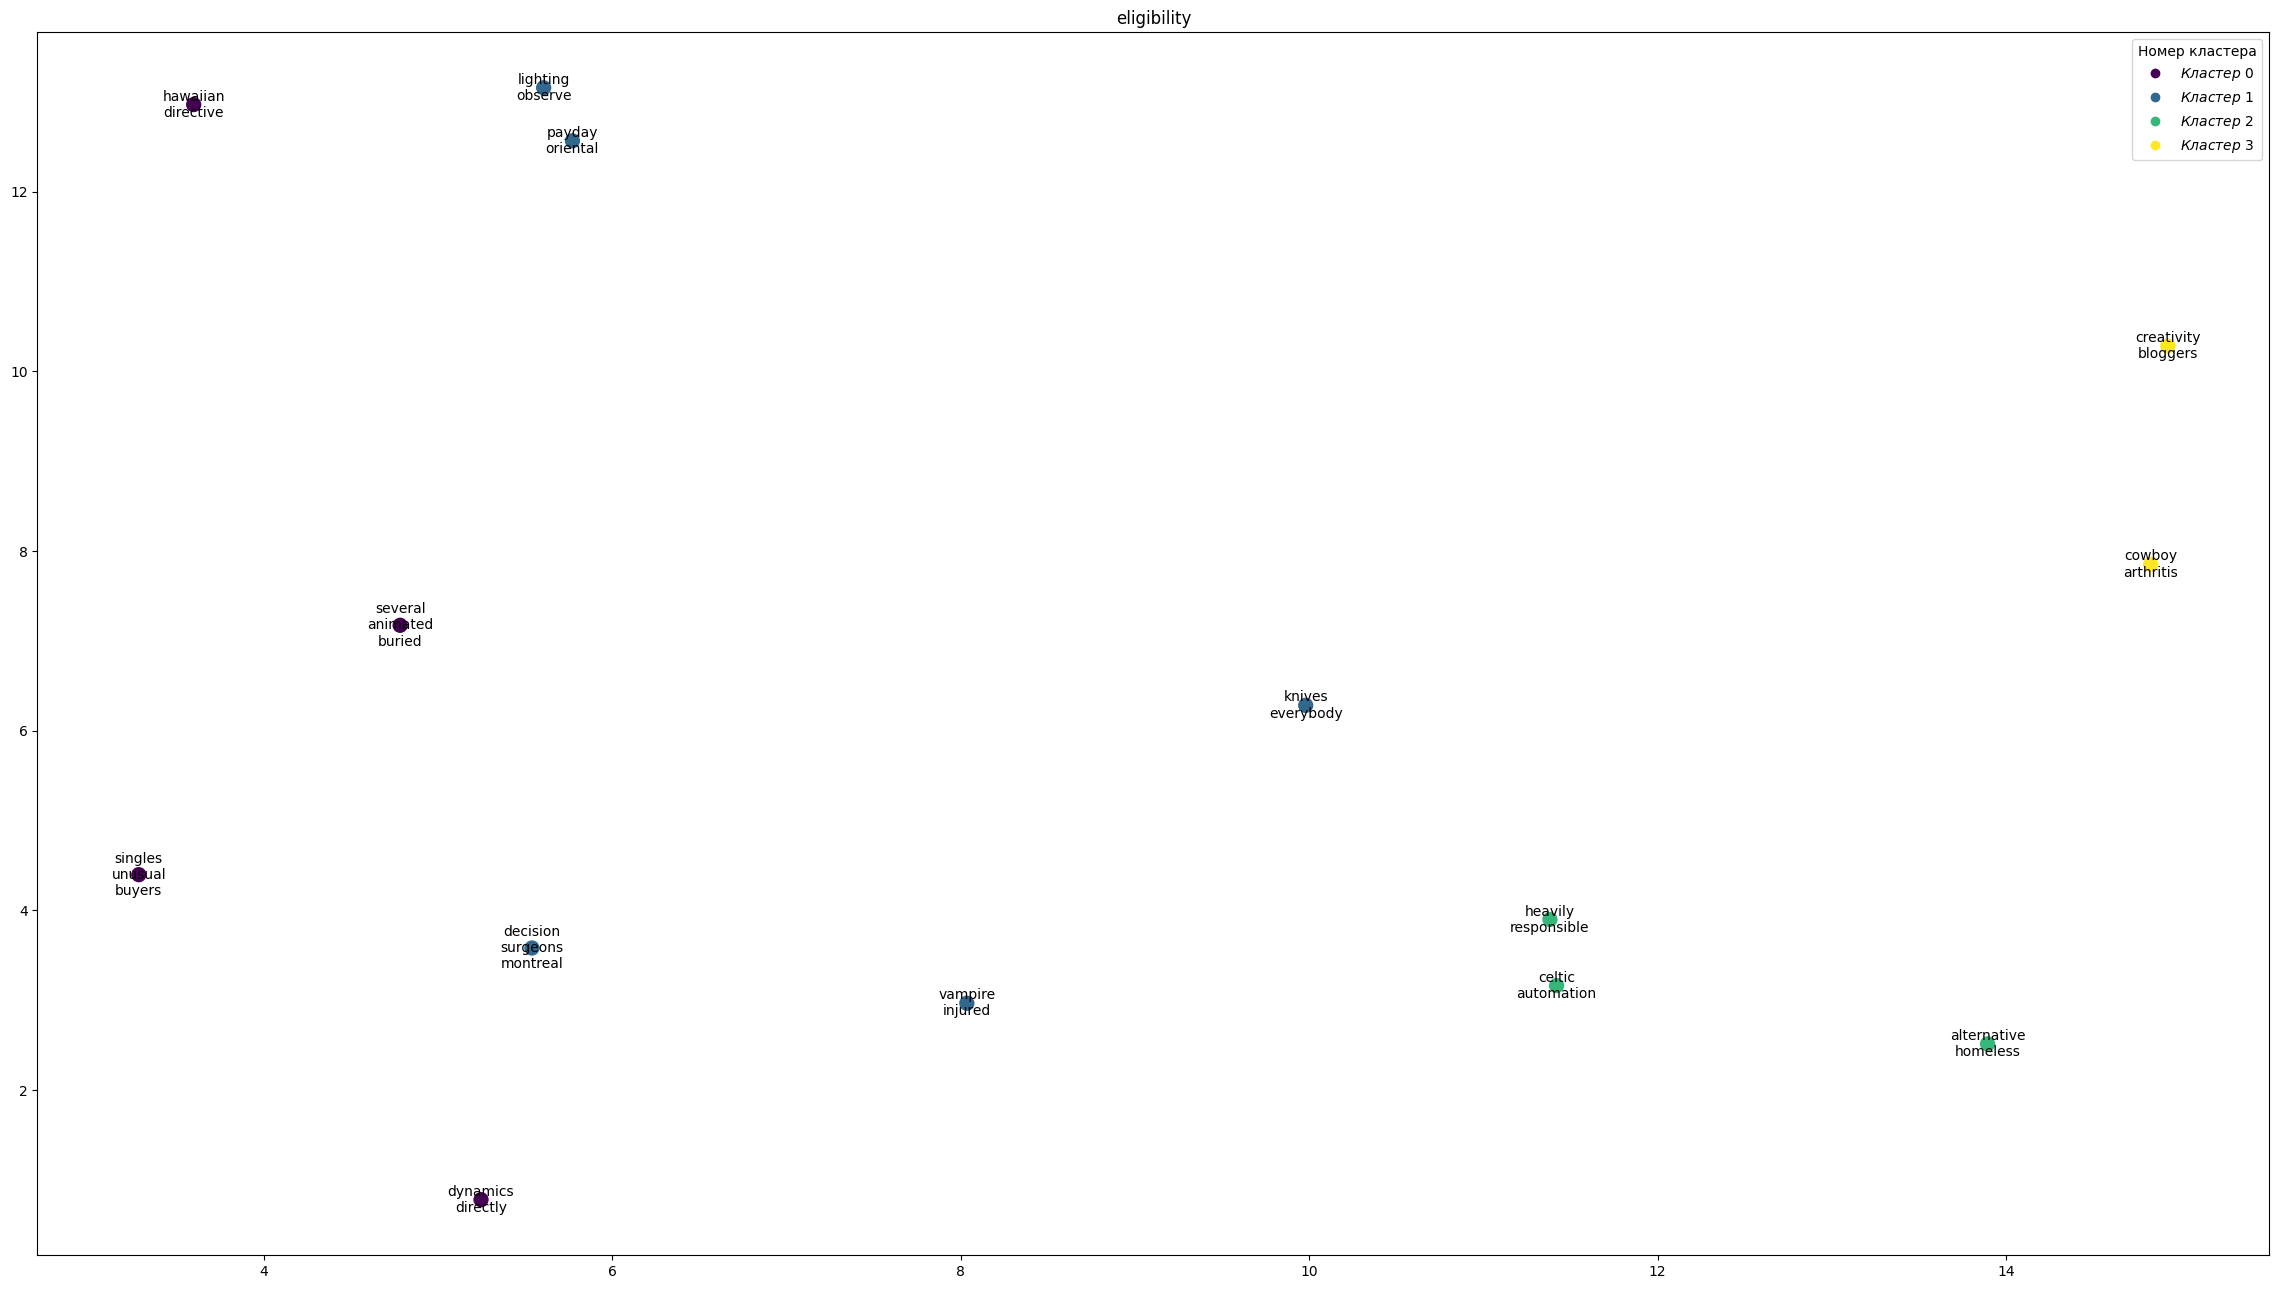

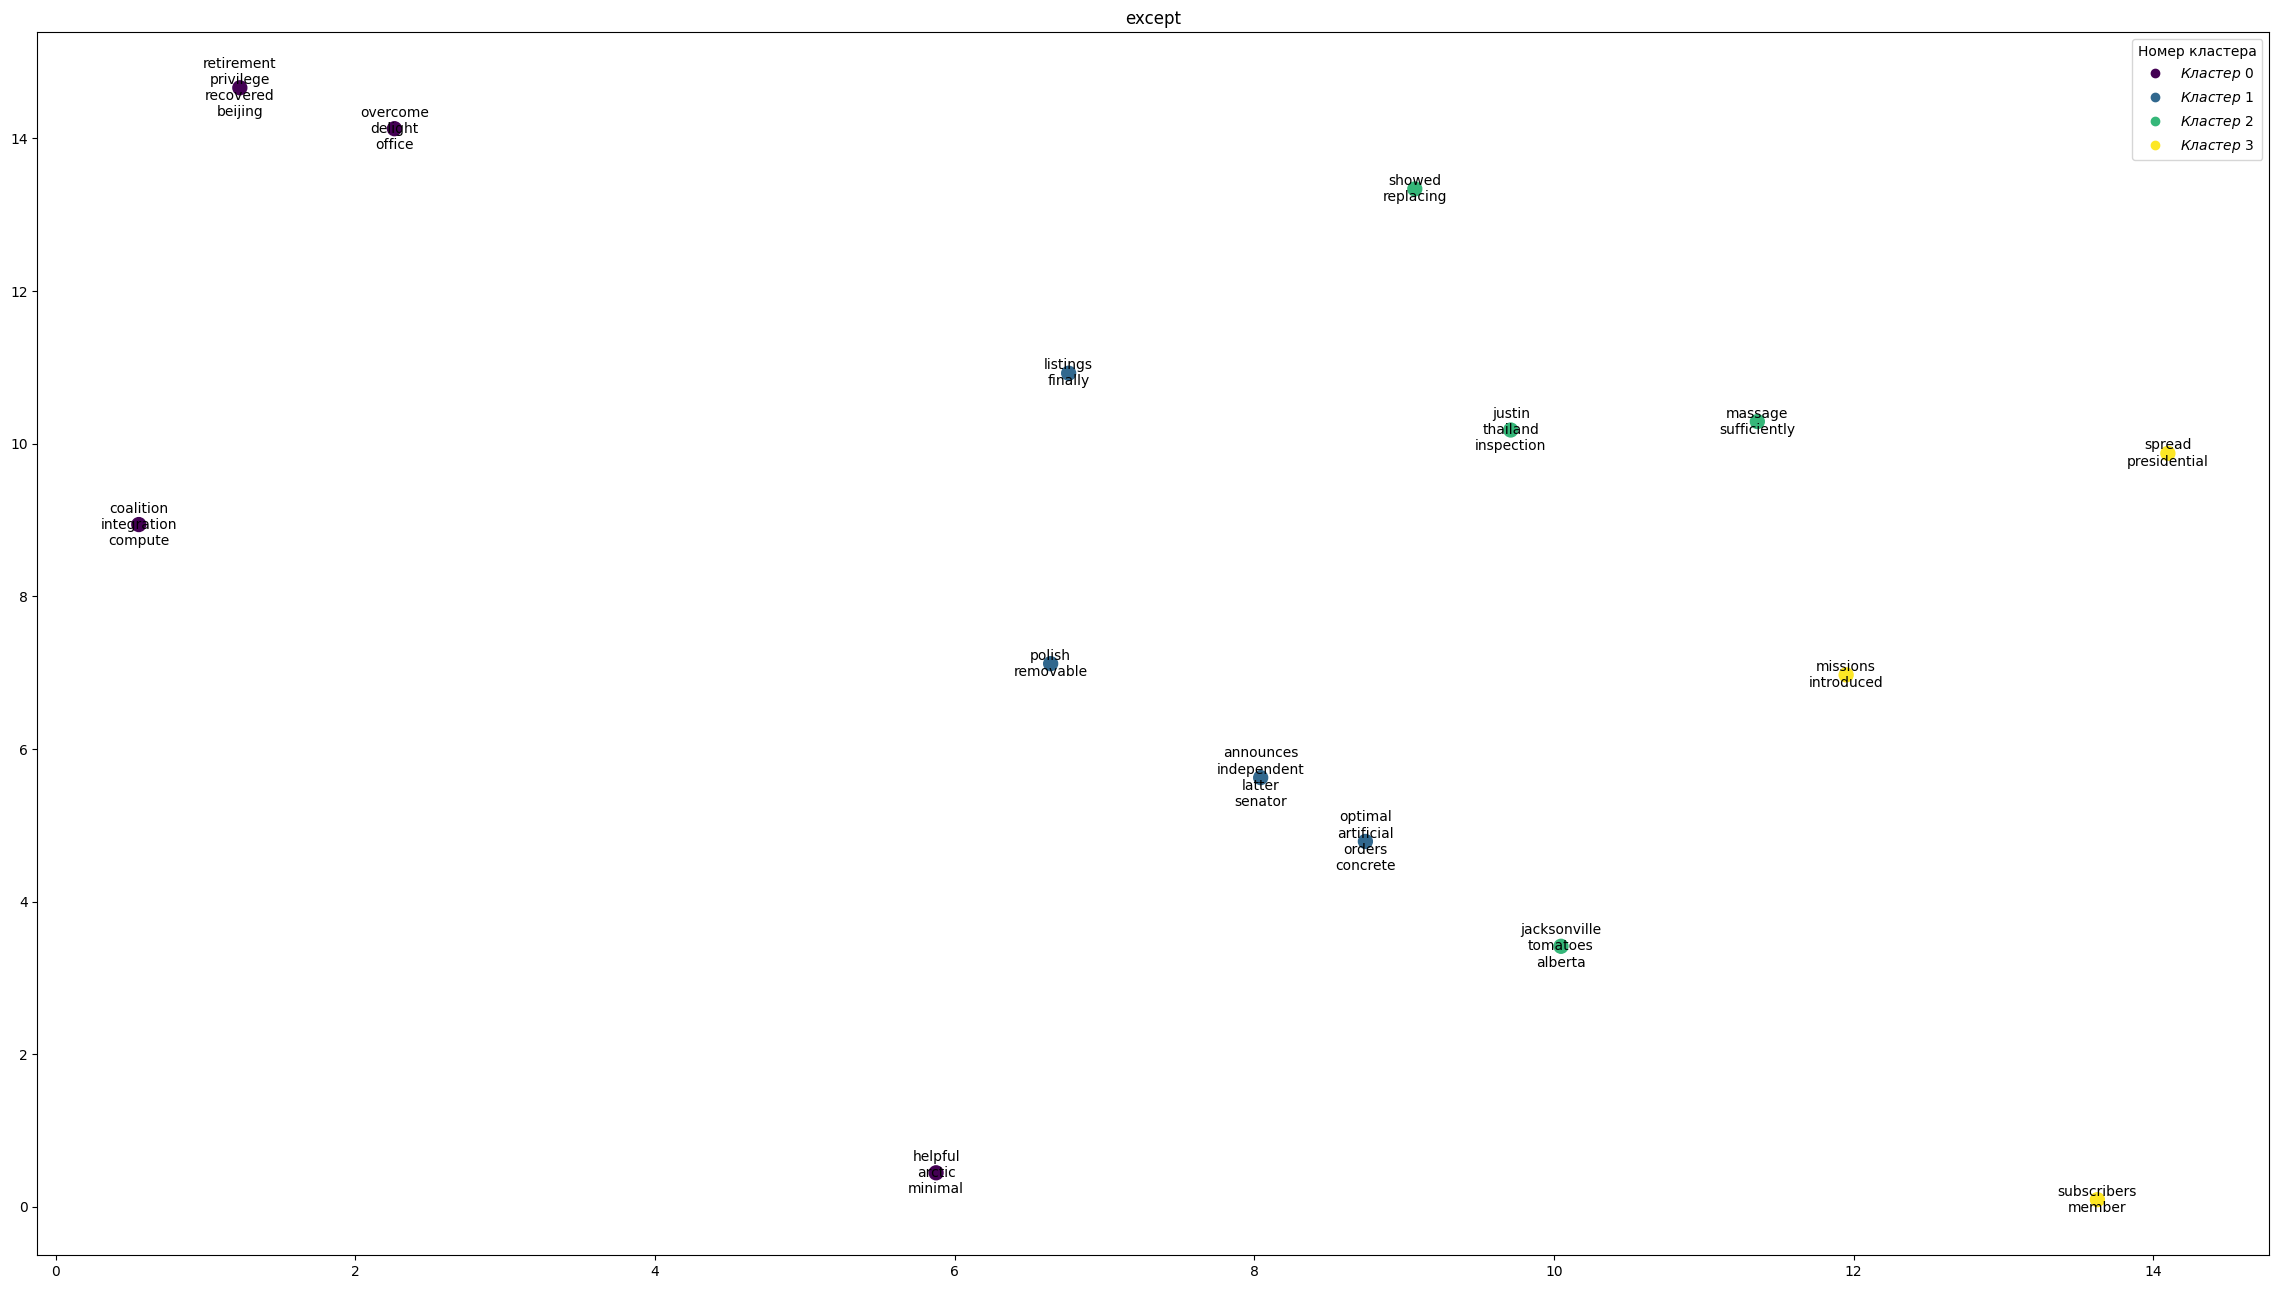

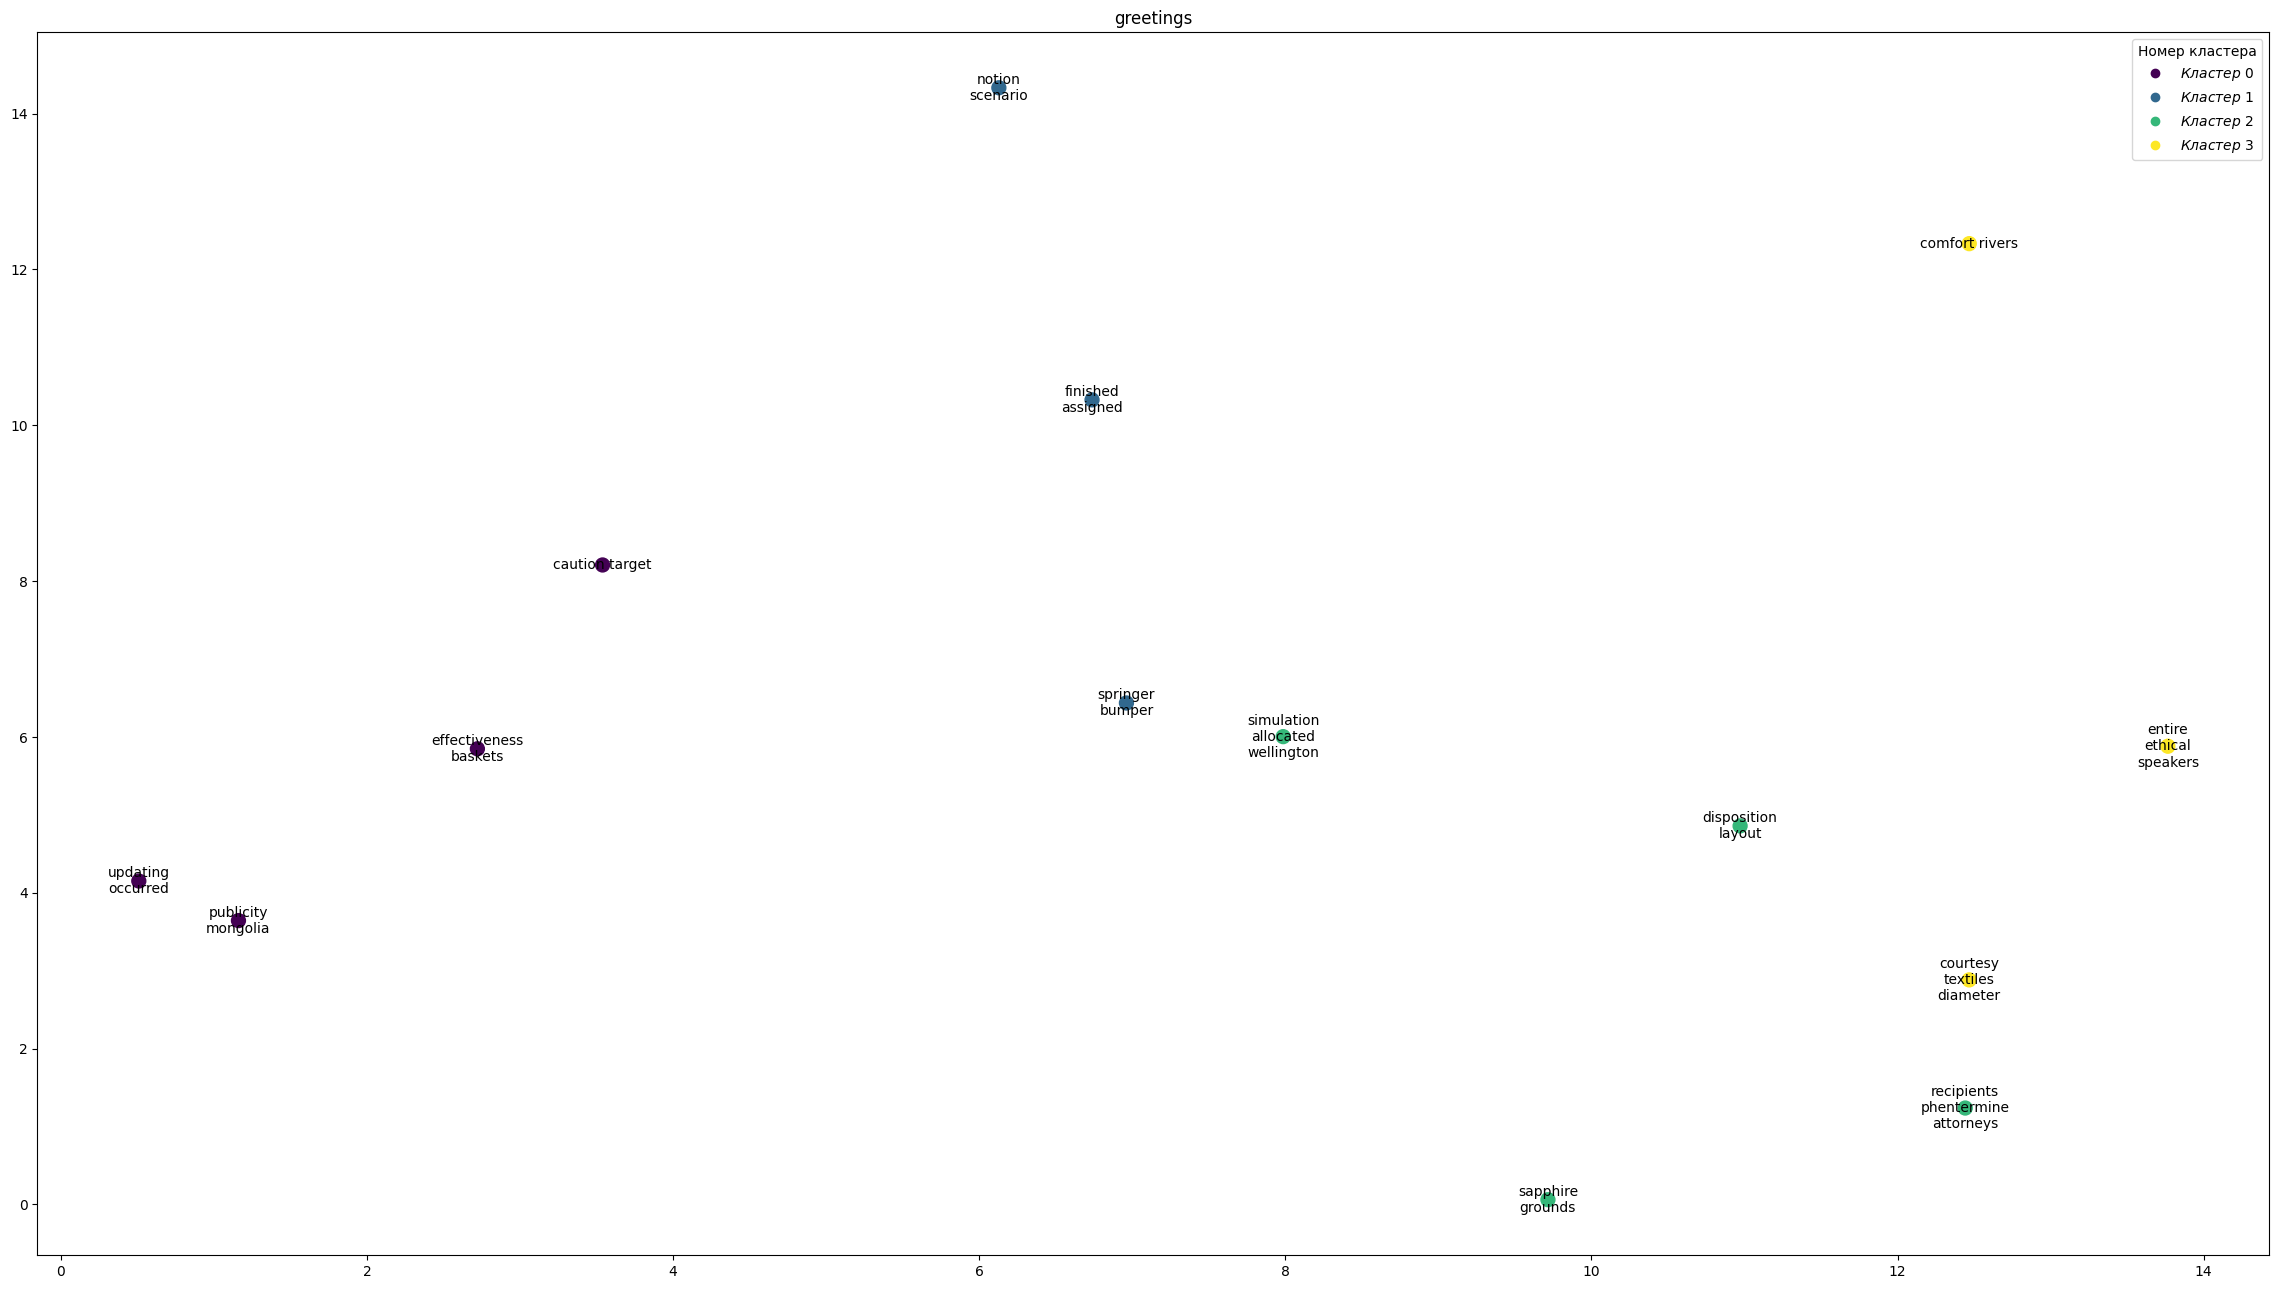

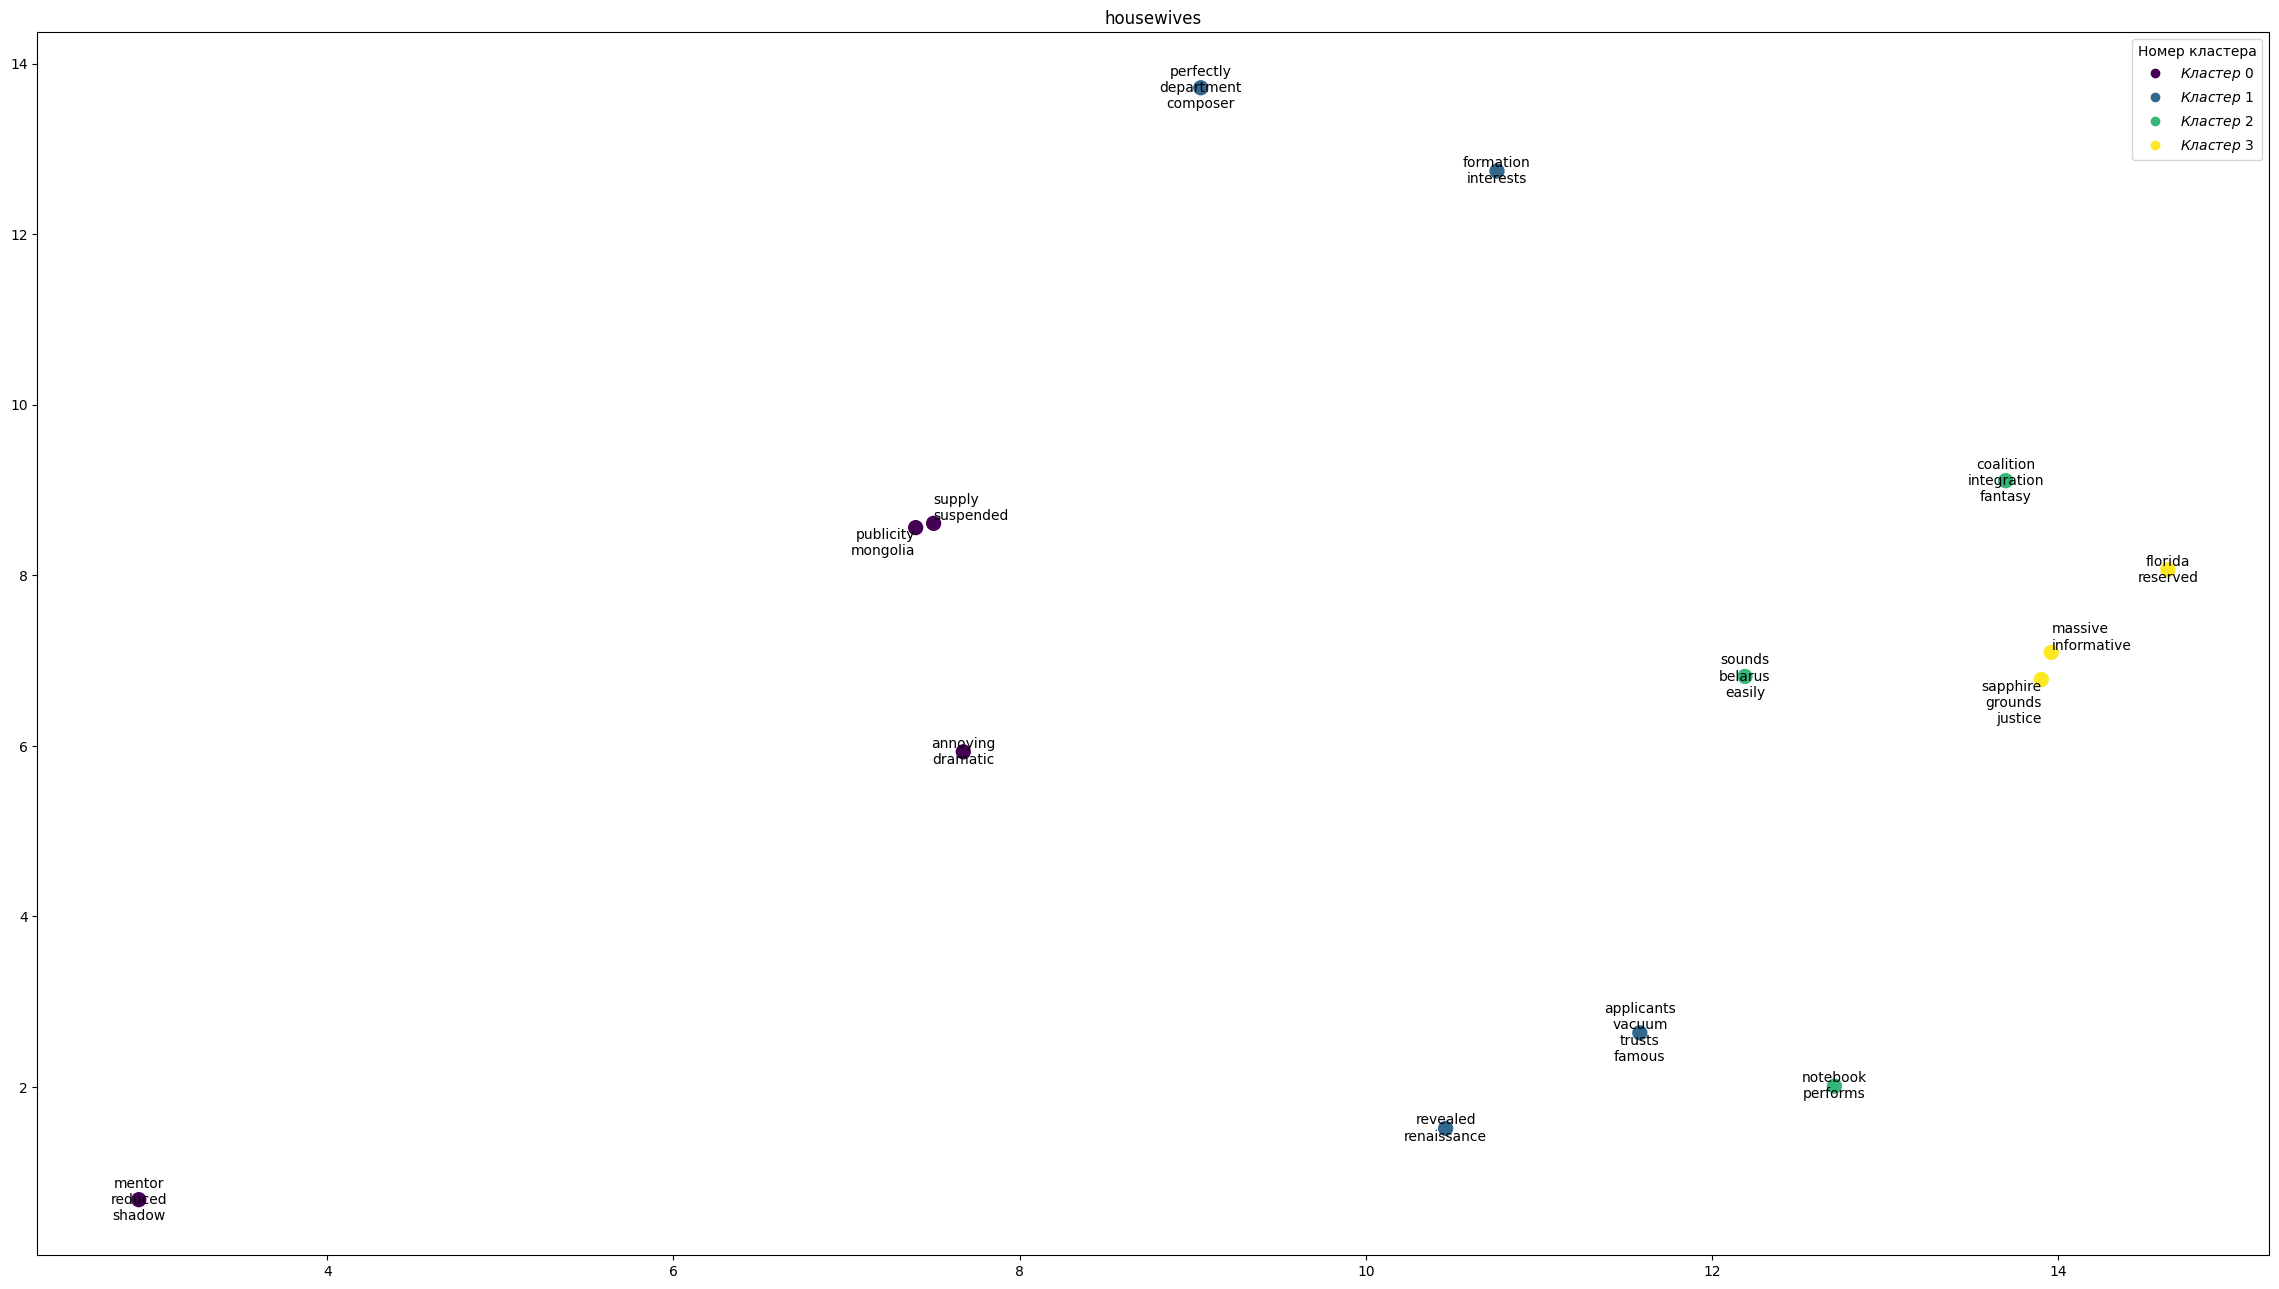

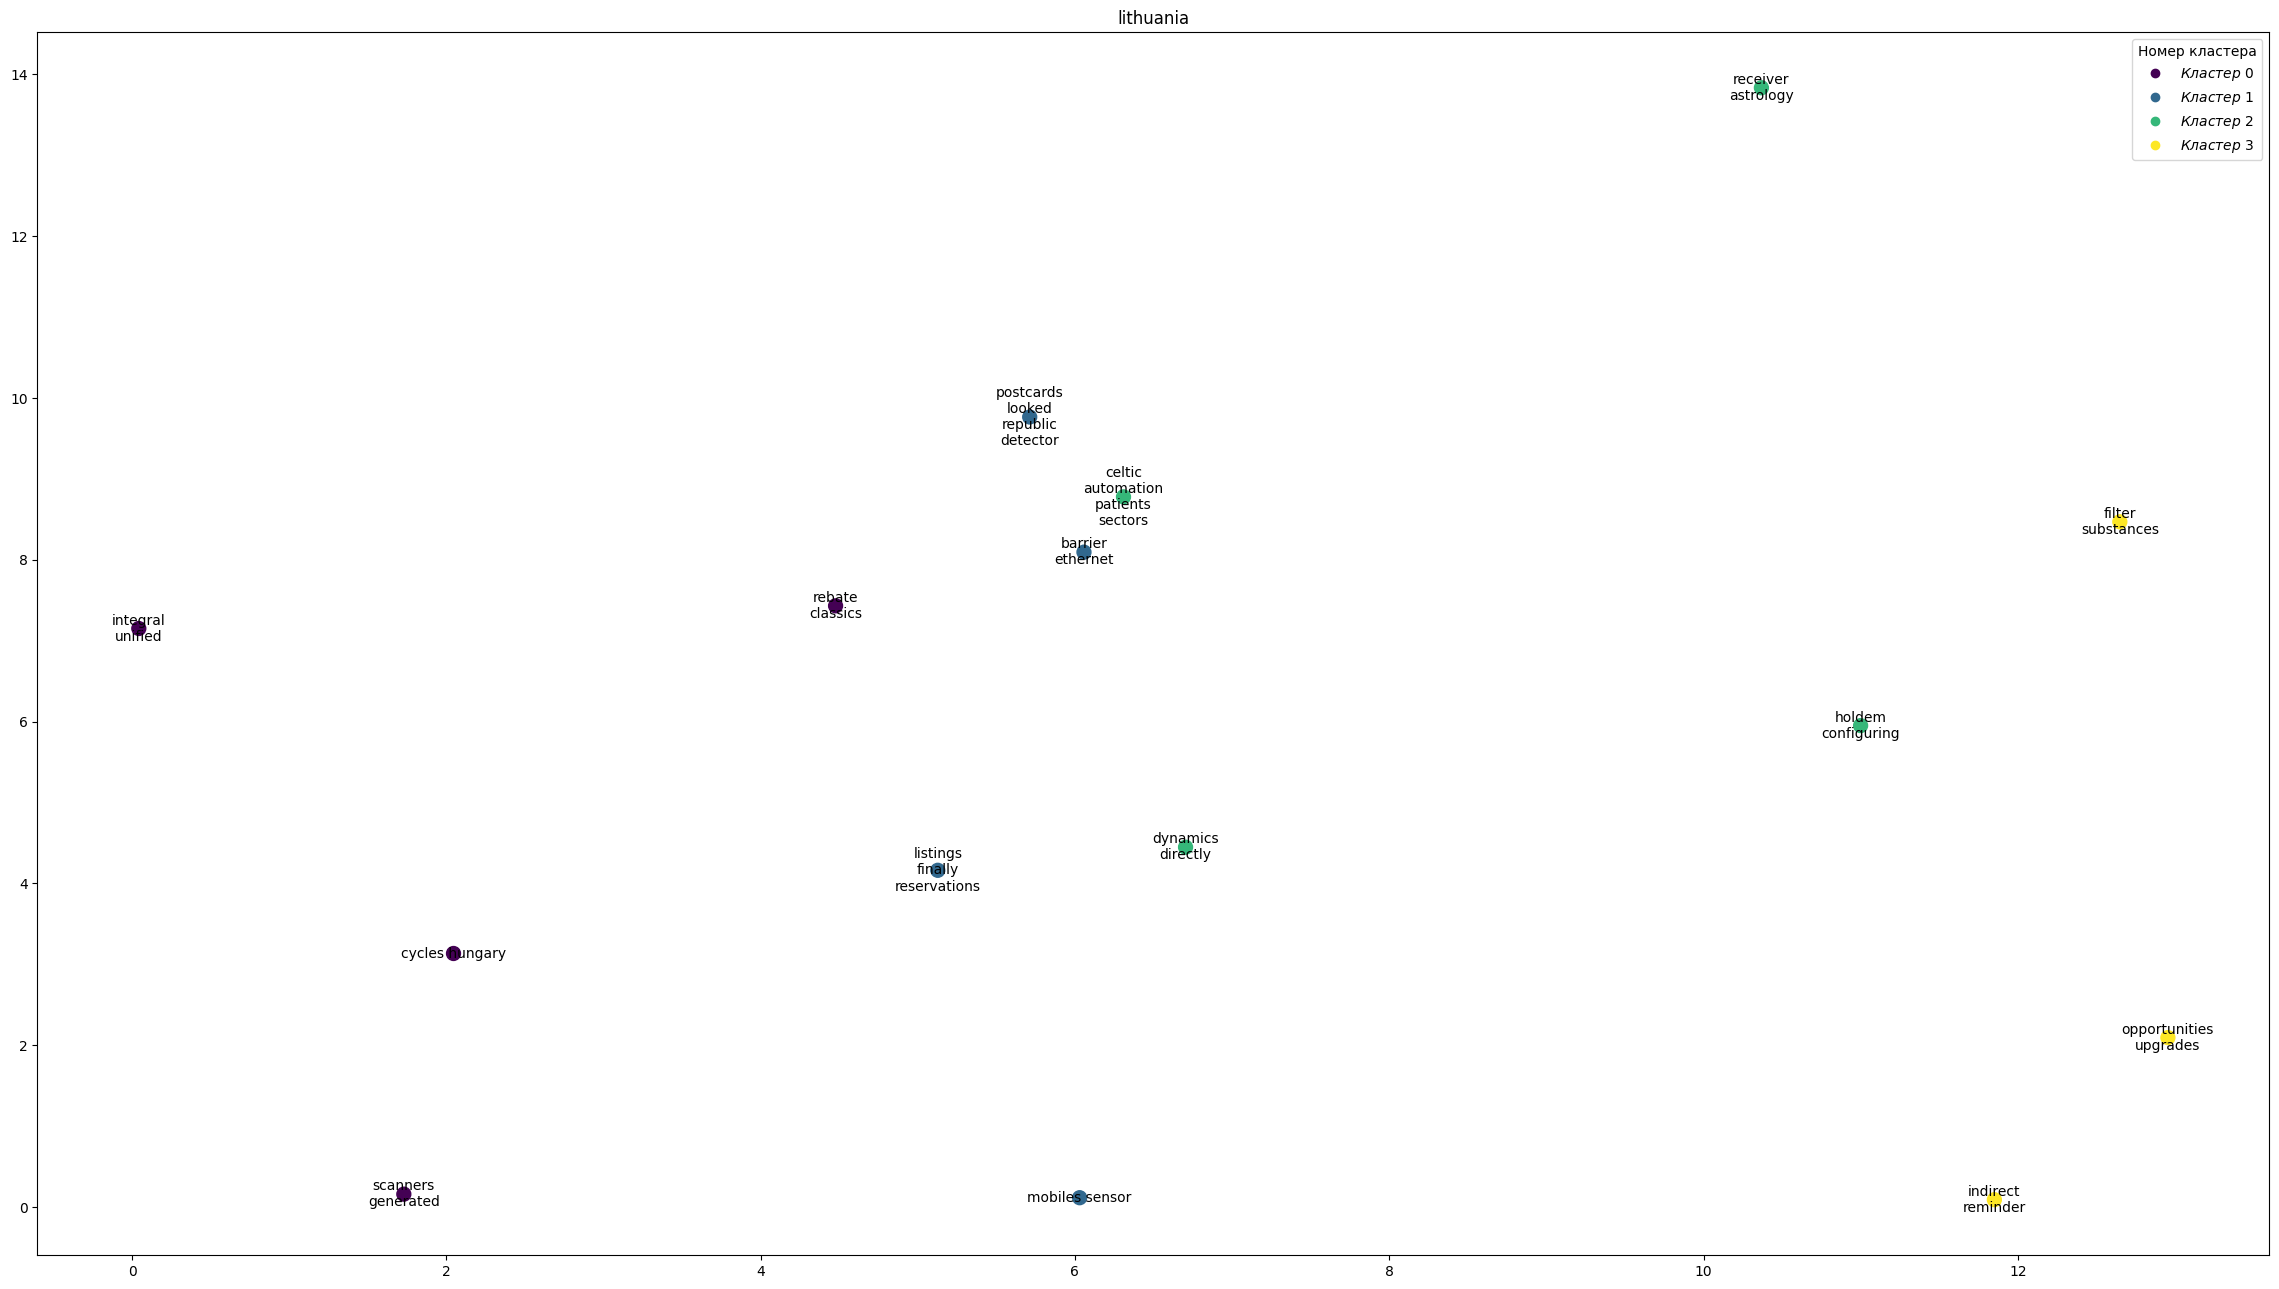

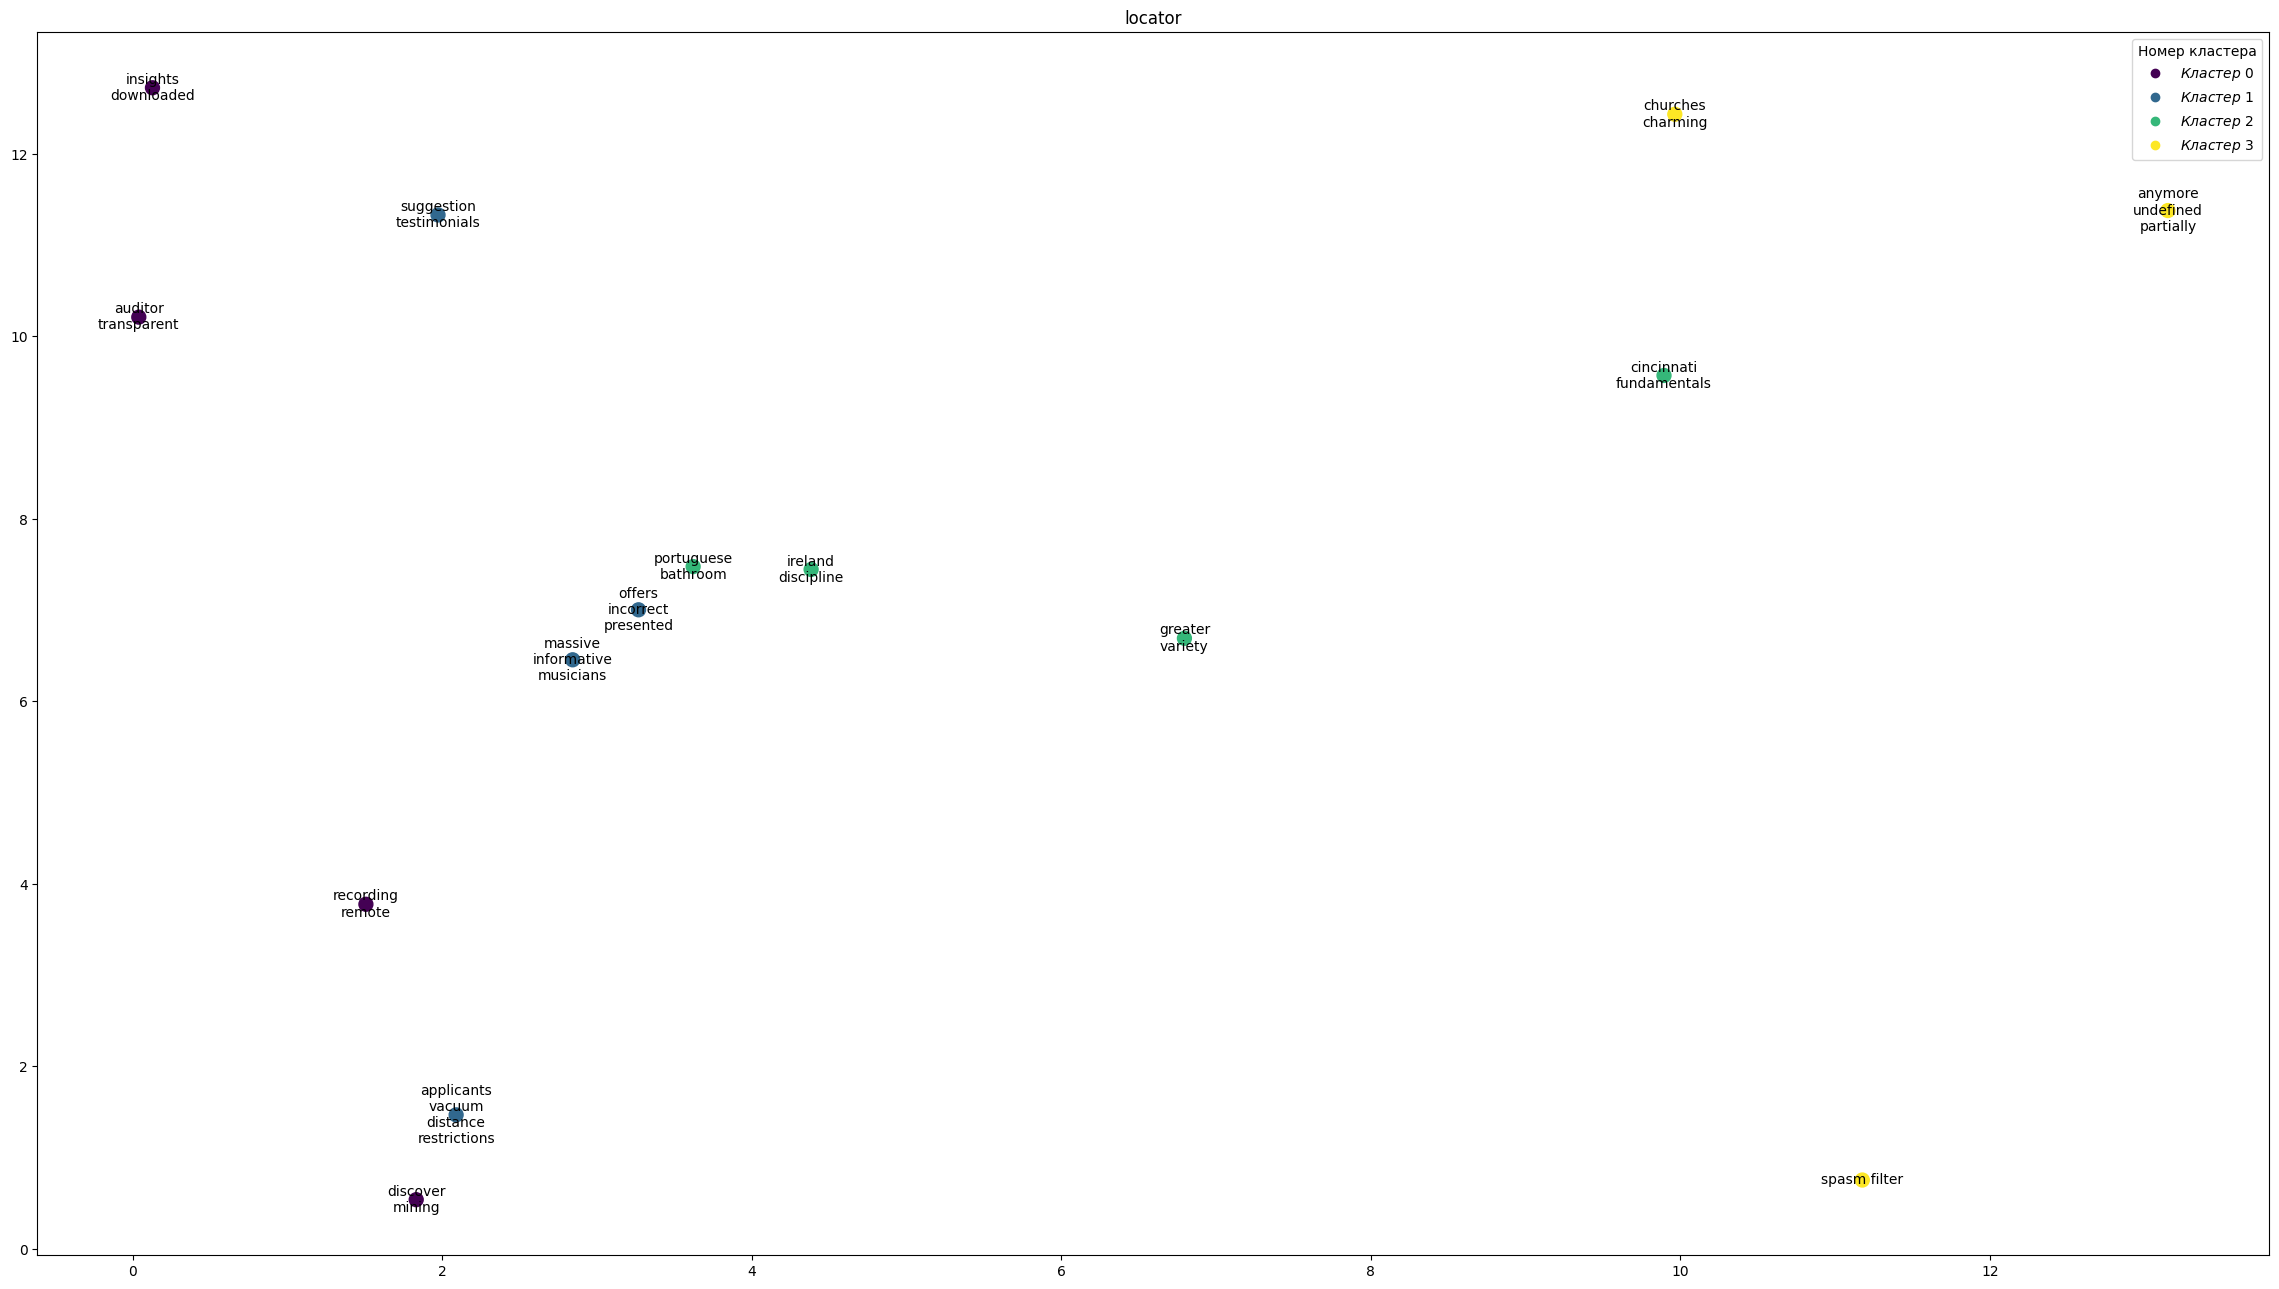

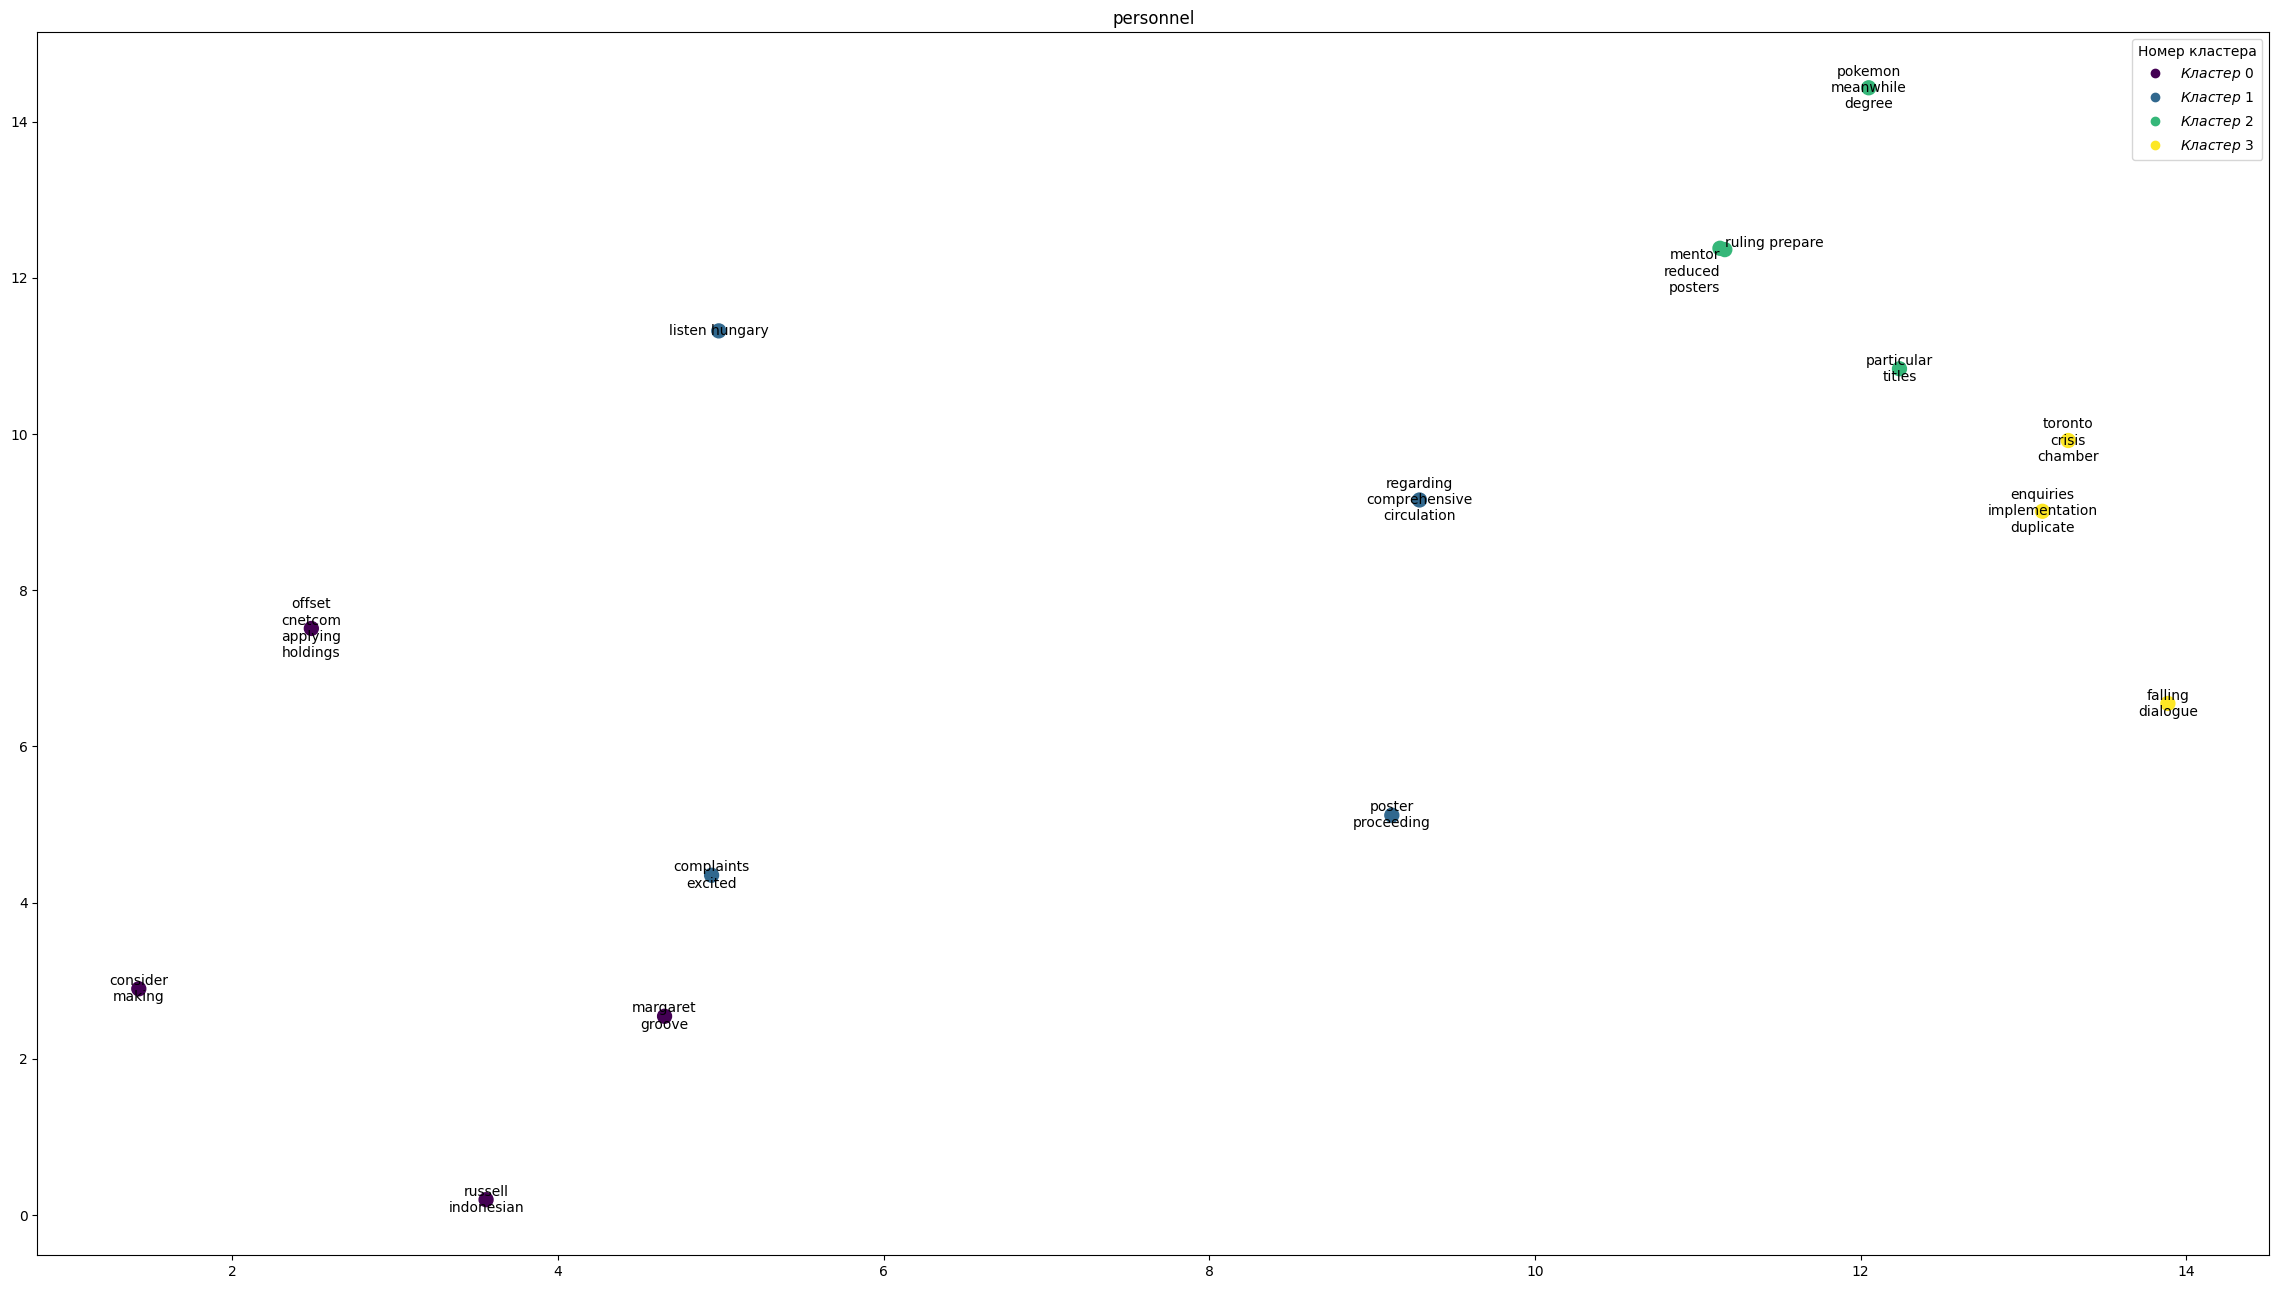

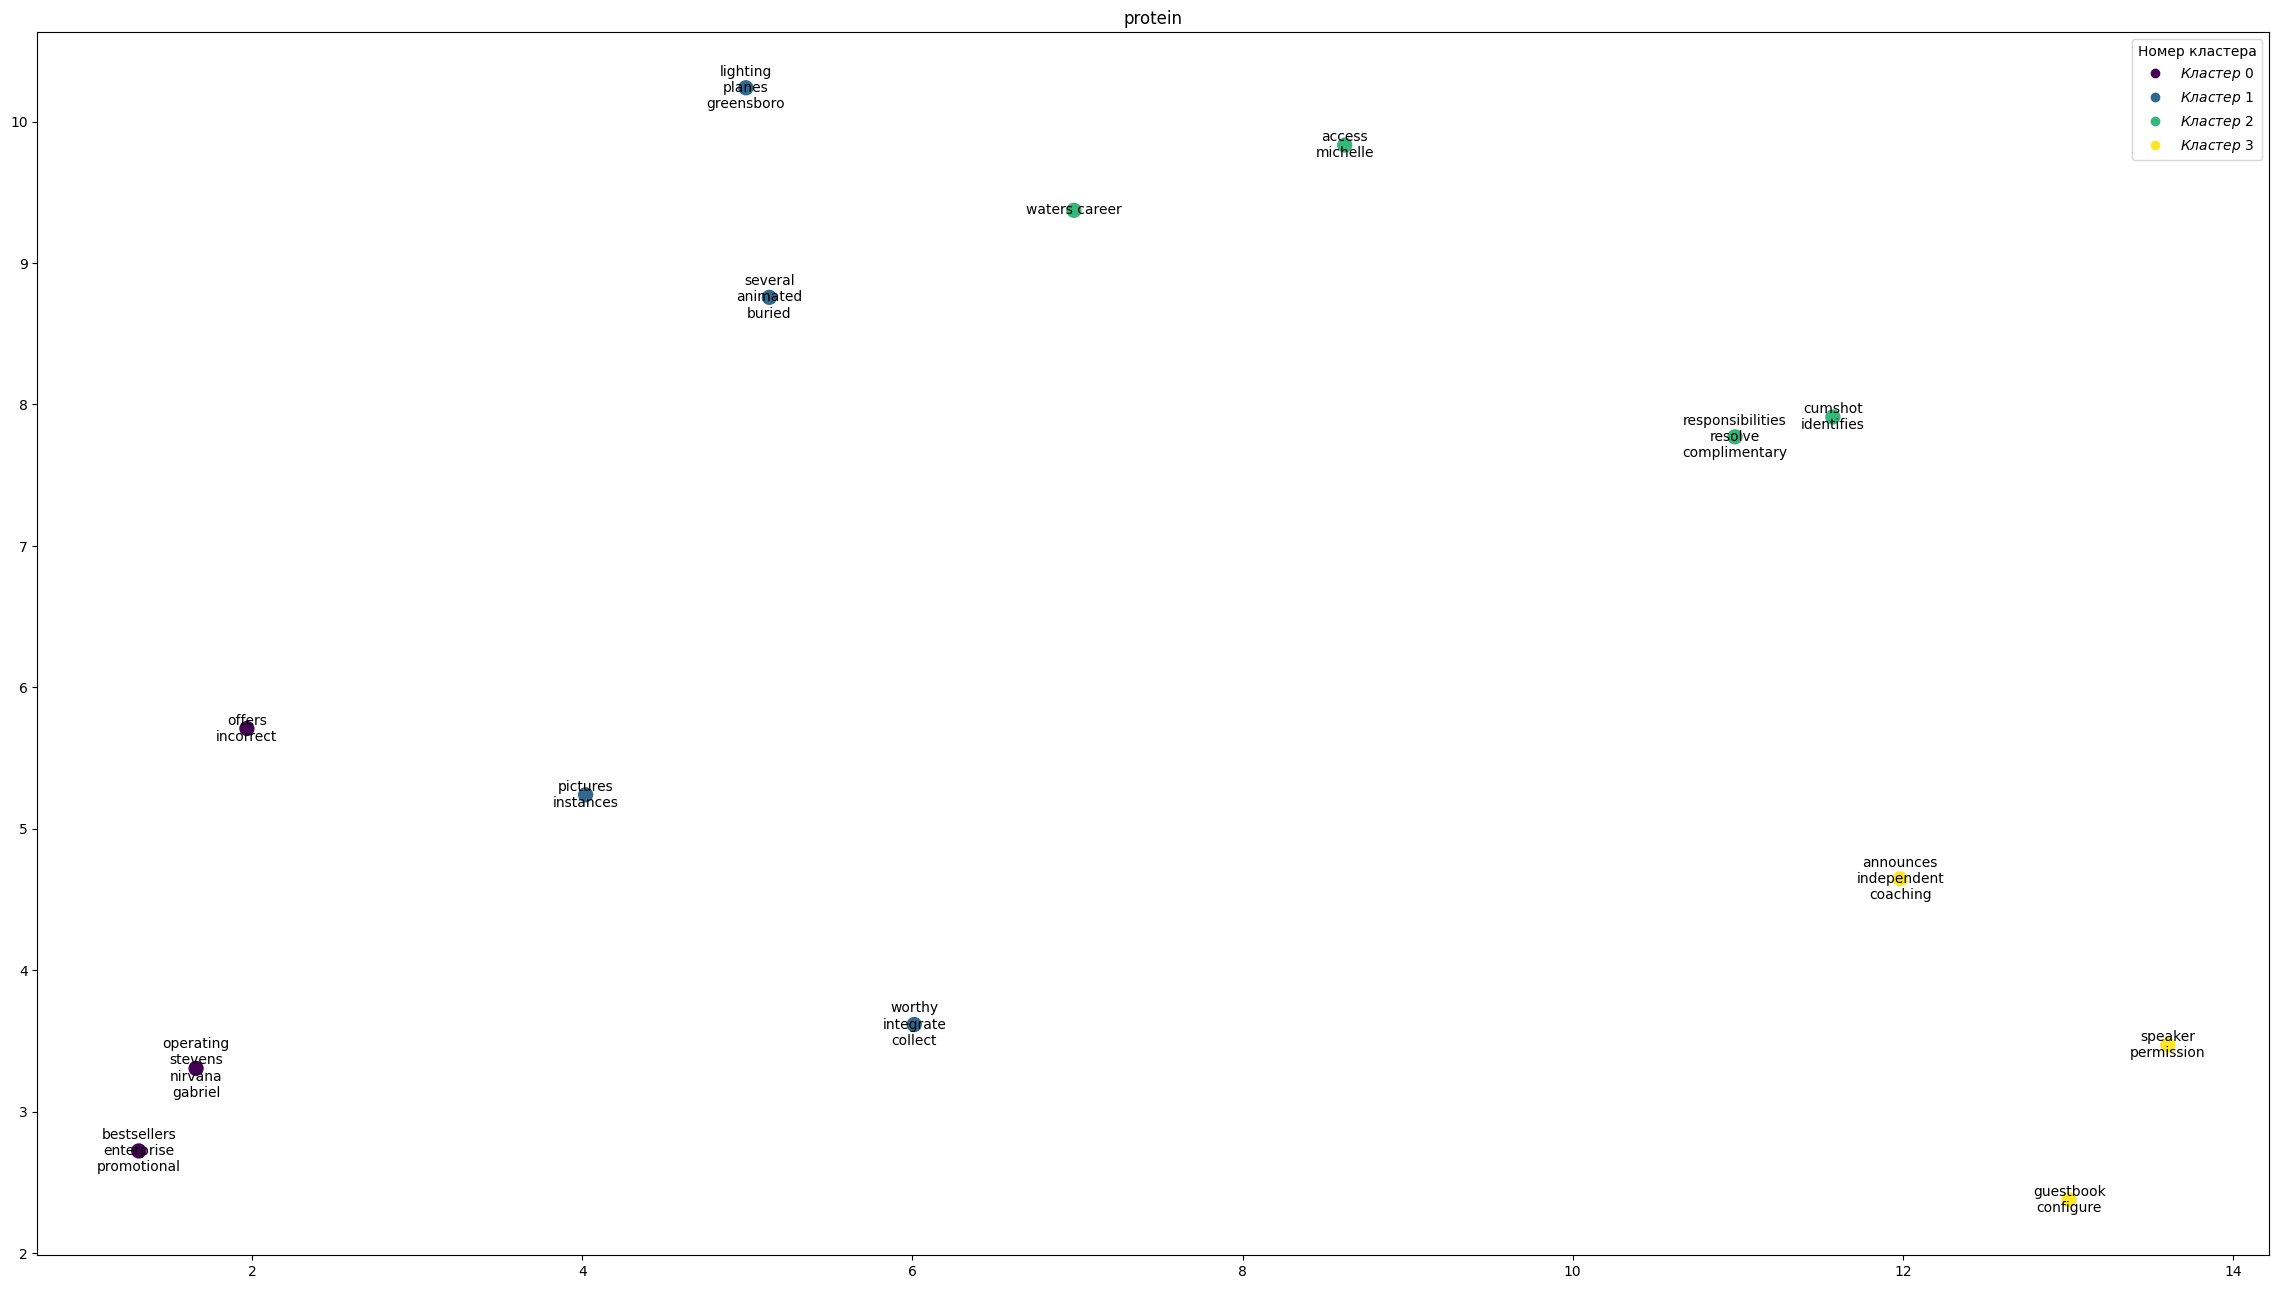

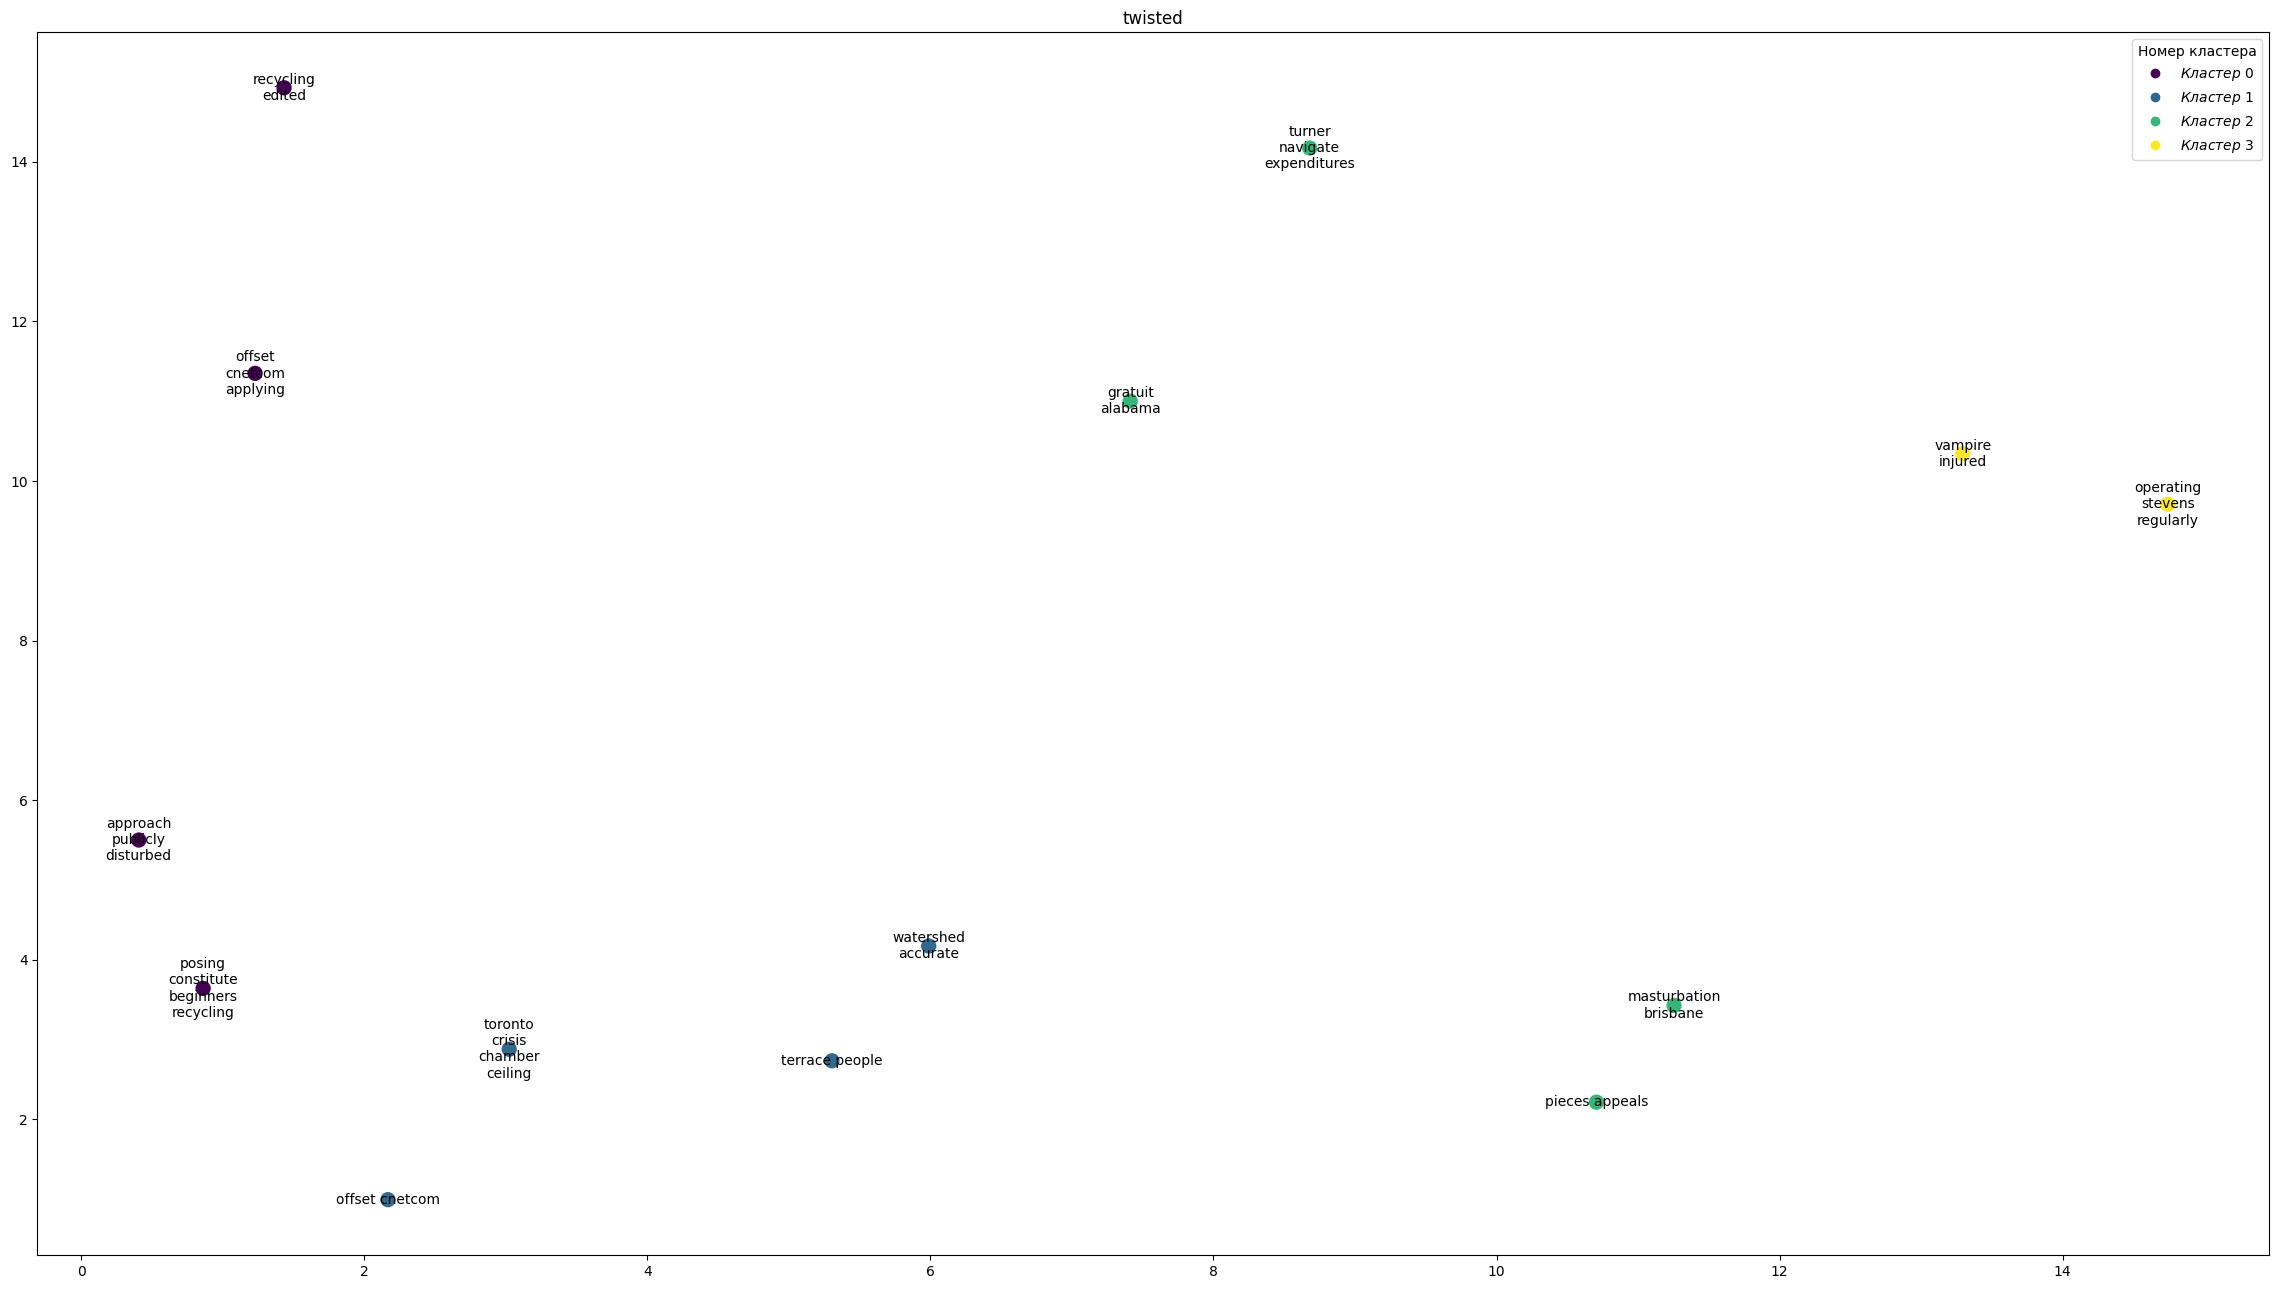

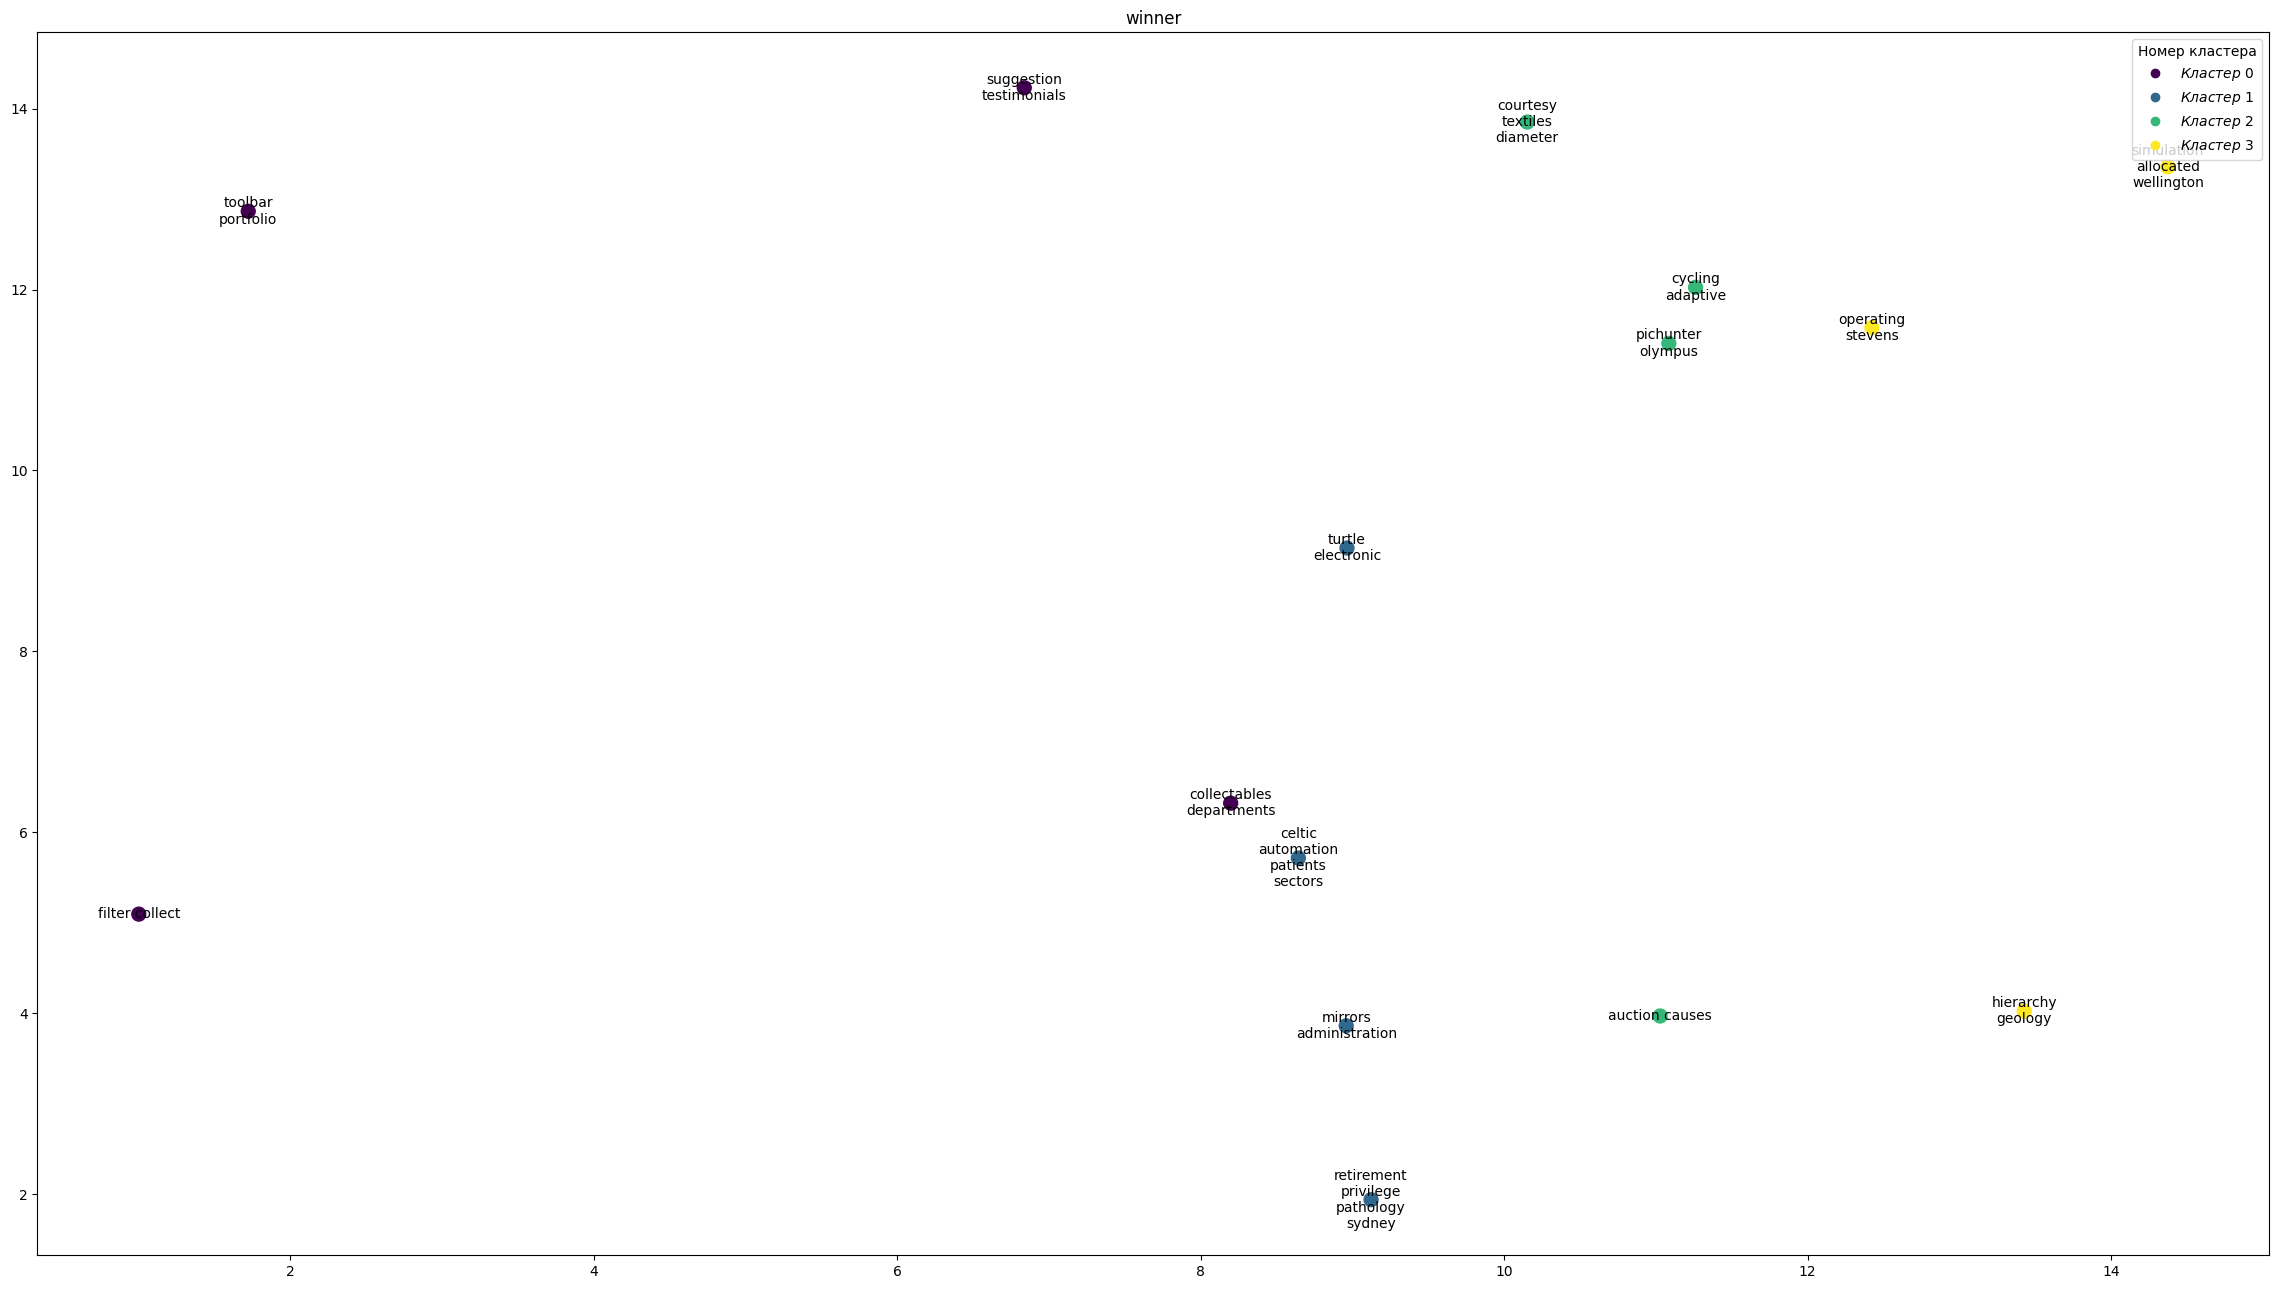

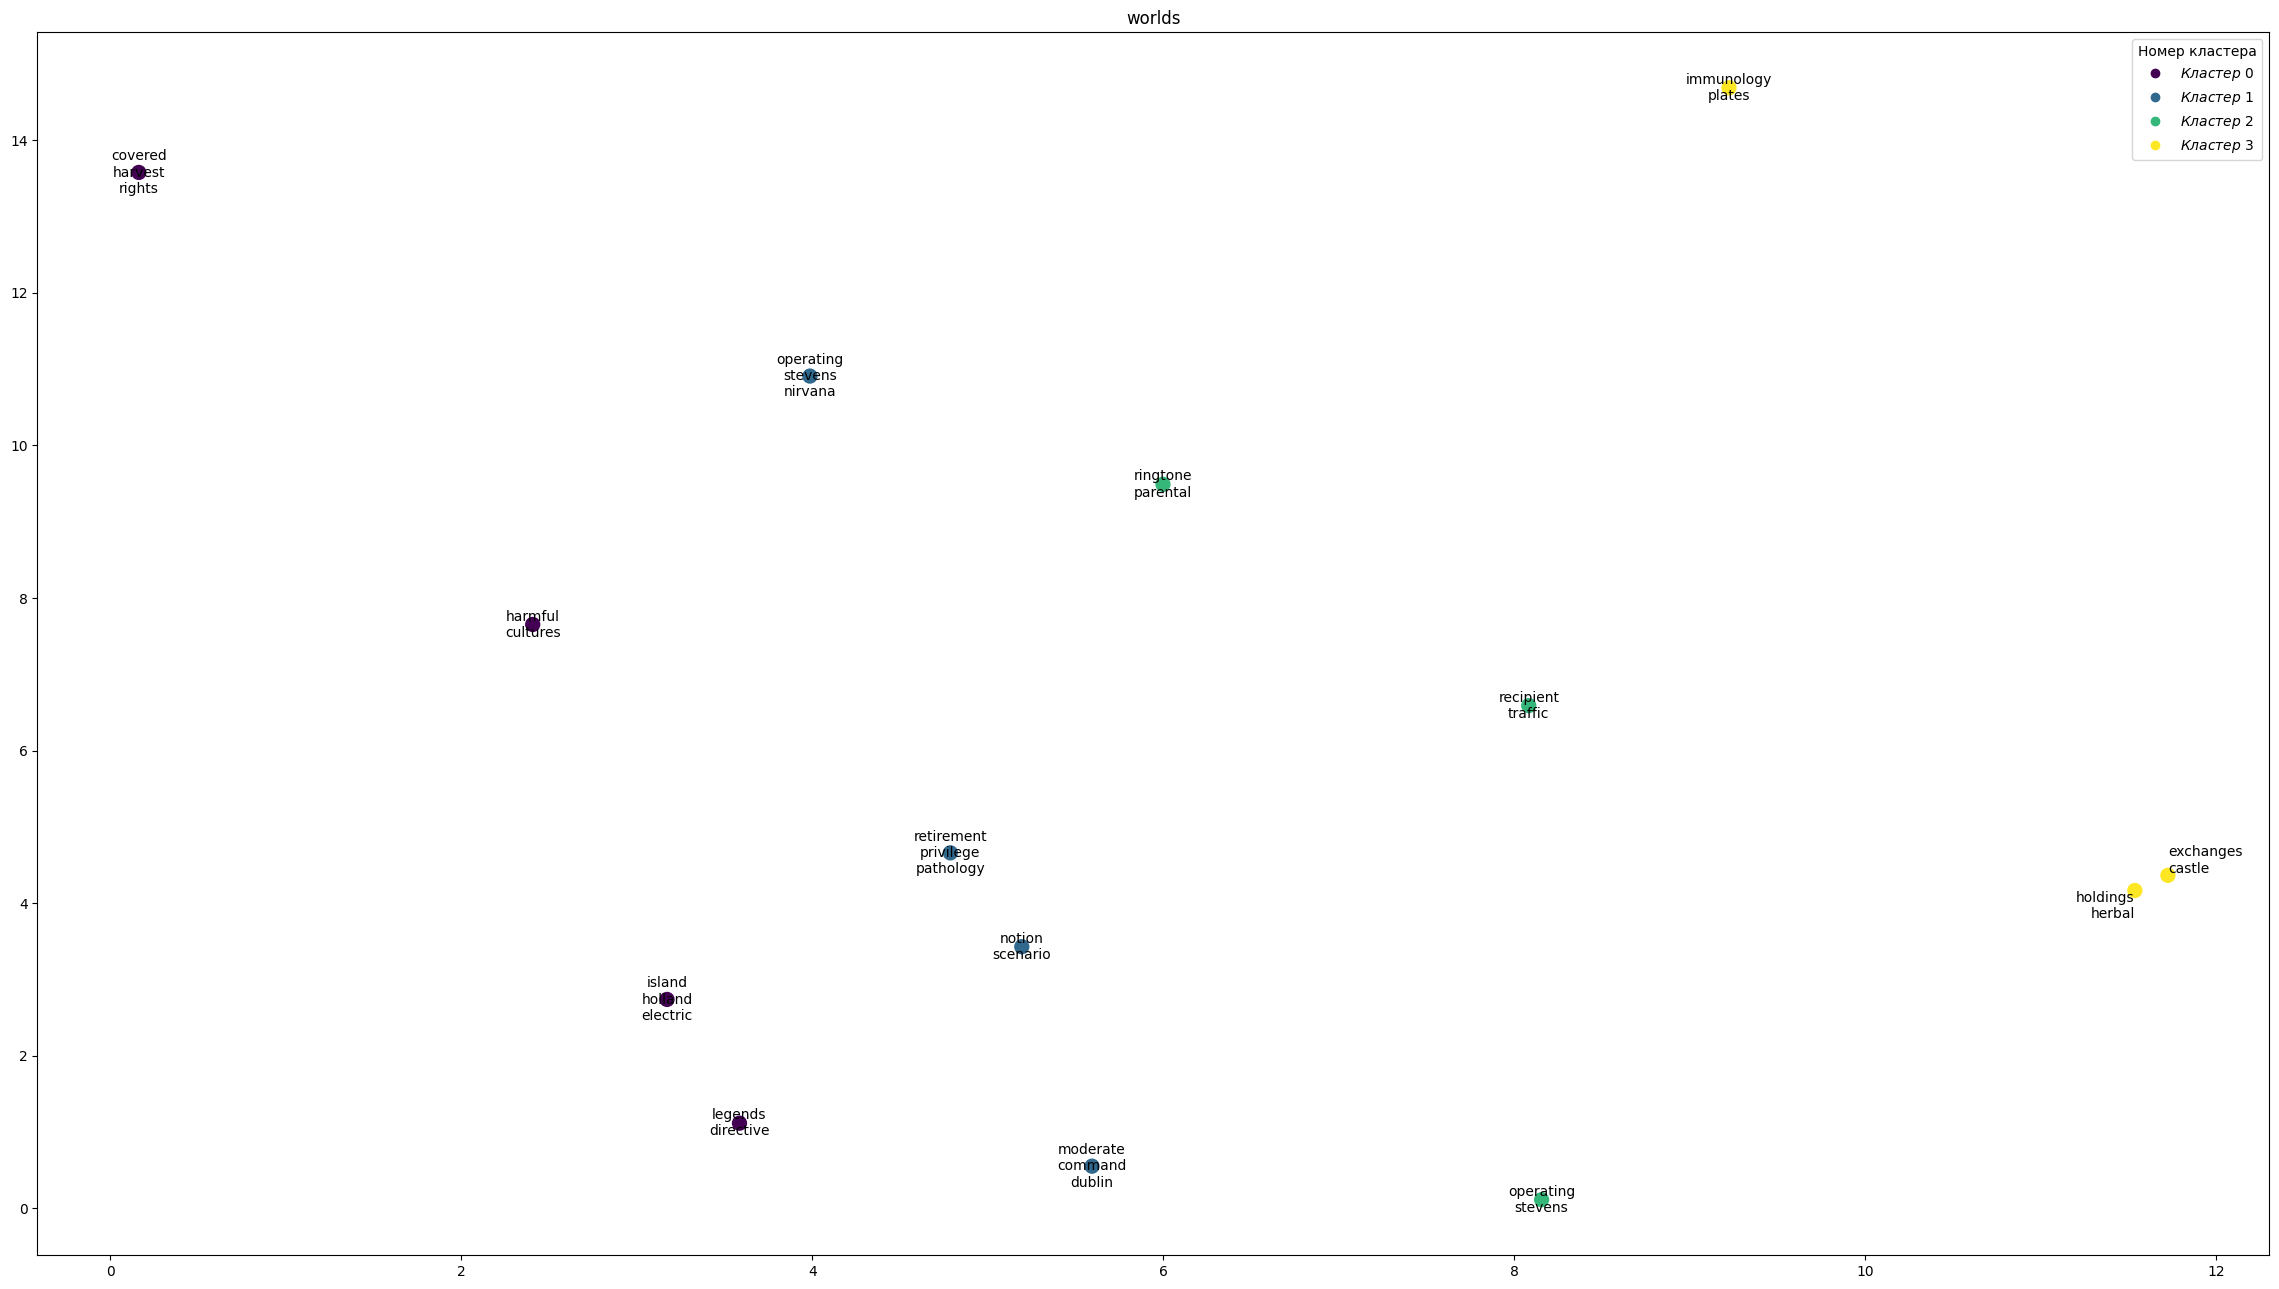

In [164]:
set_area = np.unique(sorted_data['area'])



for i in set_area:
  plt.figure(figsize=(15*1.920,15*1.080), dpi=100)

  dots = sorted_data.sort_values(by='x')
  x = np.array(dots['x'][dots['area'] == i])
  y = np.array(dots['y'][dots['area'] == i])
  color_list = np.array(sorted_data['color'][sorted_data['area'] == i])
  words = np.array(sorted_data['keyword'][sorted_data['area'] == i])

  plt.title(i)

  #переобозначаем цвета для отображения в scatter.legend_elements()
  color_set = set(color_list)
  full_set = set([color_list[0]])
  j = 0
  for k in np.arange(len(color_list)):
    if color_list[k] in full_set:
      color_list[k] = np.arange(len(list(color_set)))[j]

    else:
      j +=1
      full_set.add(color_list[k])
      color_list[k] = np.arange(len(list(color_set)))[j]
      

  cluster = np.sort(np.unique(sorted_data['cluster'][sorted_data['area'] == i]))


  #проверяем, какие точки находятся близко, чтобы избежать наложения
  dist_x = x[1:] - x[:-1]
  dist_y = y[1:] - y[:-1]
  index_x = np.where(abs(dist_x) < 0.2)[0]
  index_y = np.where(abs(dist_y) < 0.5)[0]
  #задаем позиции текста относительно точек (для накладывающегося текста разносим его по разным краям)
  index = list(set(index_x) & set(index_y))
  position_x = ['center']*len(x)
  position_y = ['center']*len(x)

  for j in np.arange(len(x)):
    if len(words[j]) >= 15:
      words[j] = words[j].replace(' ', '\n') #переносим строку для словосочетаний длиннее 15 символов
    if  len(np.where(index == j)[0]) == 1:
      position_x[j+1] = 'left'
      position_x[j] = 'right'
      position_y[j+1] = 'bottom'
      position_y[j]='top'
    plt.text(x[j], y[j],words[j],rotation=0,
             horizontalalignment=position_x[j],verticalalignment=position_y[j], wrap=True)
  

  scatter = plt.scatter(x, y, c = color_list, s=100)
  handles, labels = scatter.legend_elements()
  
  for m in np.arange(len(cluster)):
    labels[m] = labels[m].replace('$\\mathdefault{' + str(m)+'}$', '$'+'Кластер\ '+ str(int(cluster[m]))+'$')

  legend = plt.legend(handles, labels, title="Номер кластера")

  


  plt.savefig(i, dpi=200)
  
